In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

In [2]:
df = pd.read_csv('data.csv")

In [3]:
df

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814                      0

In [4]:
df.columns = df.columns.str.lower()

In [5]:
df

bankrupt?   roa(c) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       roa(a) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       roa(b) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       operating gross margin   realized sales gross margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       operating profit rate   pre-tax net interest rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       after-tax net interest rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814                      0

In [6]:
df.isnull().sum()

bankrupt?                                                   0
 roa(c) before interest and depreciation before interest    0
 roa(a) before interest and % after tax                     0
 roa(b) before interest and depreciation after tax          0
 operating gross margin                                     0
                                                           ..
 liability to equity                                        0
 degree of financial leverage (dfl)                         0
 interest coverage ratio (interest expense to ebit)         0
 net income flag                                            0
 equity to liability                                        0
Length: 96, dtype: int64

### EDA

In [14]:
# Renaming the bankrupt column
df = df.copy().rename(columns={ 'bankrupt?': 'bankrupt'})

In [17]:
df.bankrupt.value_counts(normalize=True)

0    0.967737
1    0.032263
Name: bankrupt, dtype: float64

In [19]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [20]:
len (df), len(df_train), len(df_val), len(df_test)

(6819, 4091, 1364, 1364)

In [21]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_full_train = df_full_train.reset_index(drop=True)

In [22]:
y_train = df_train.bankrupt.values
y_val = df_val.bankrupt.values
y_test = df_test.bankrupt.values

In [23]:
del df_train['bankrupt']
del df_val['bankrupt']
del df_test['bankrupt']

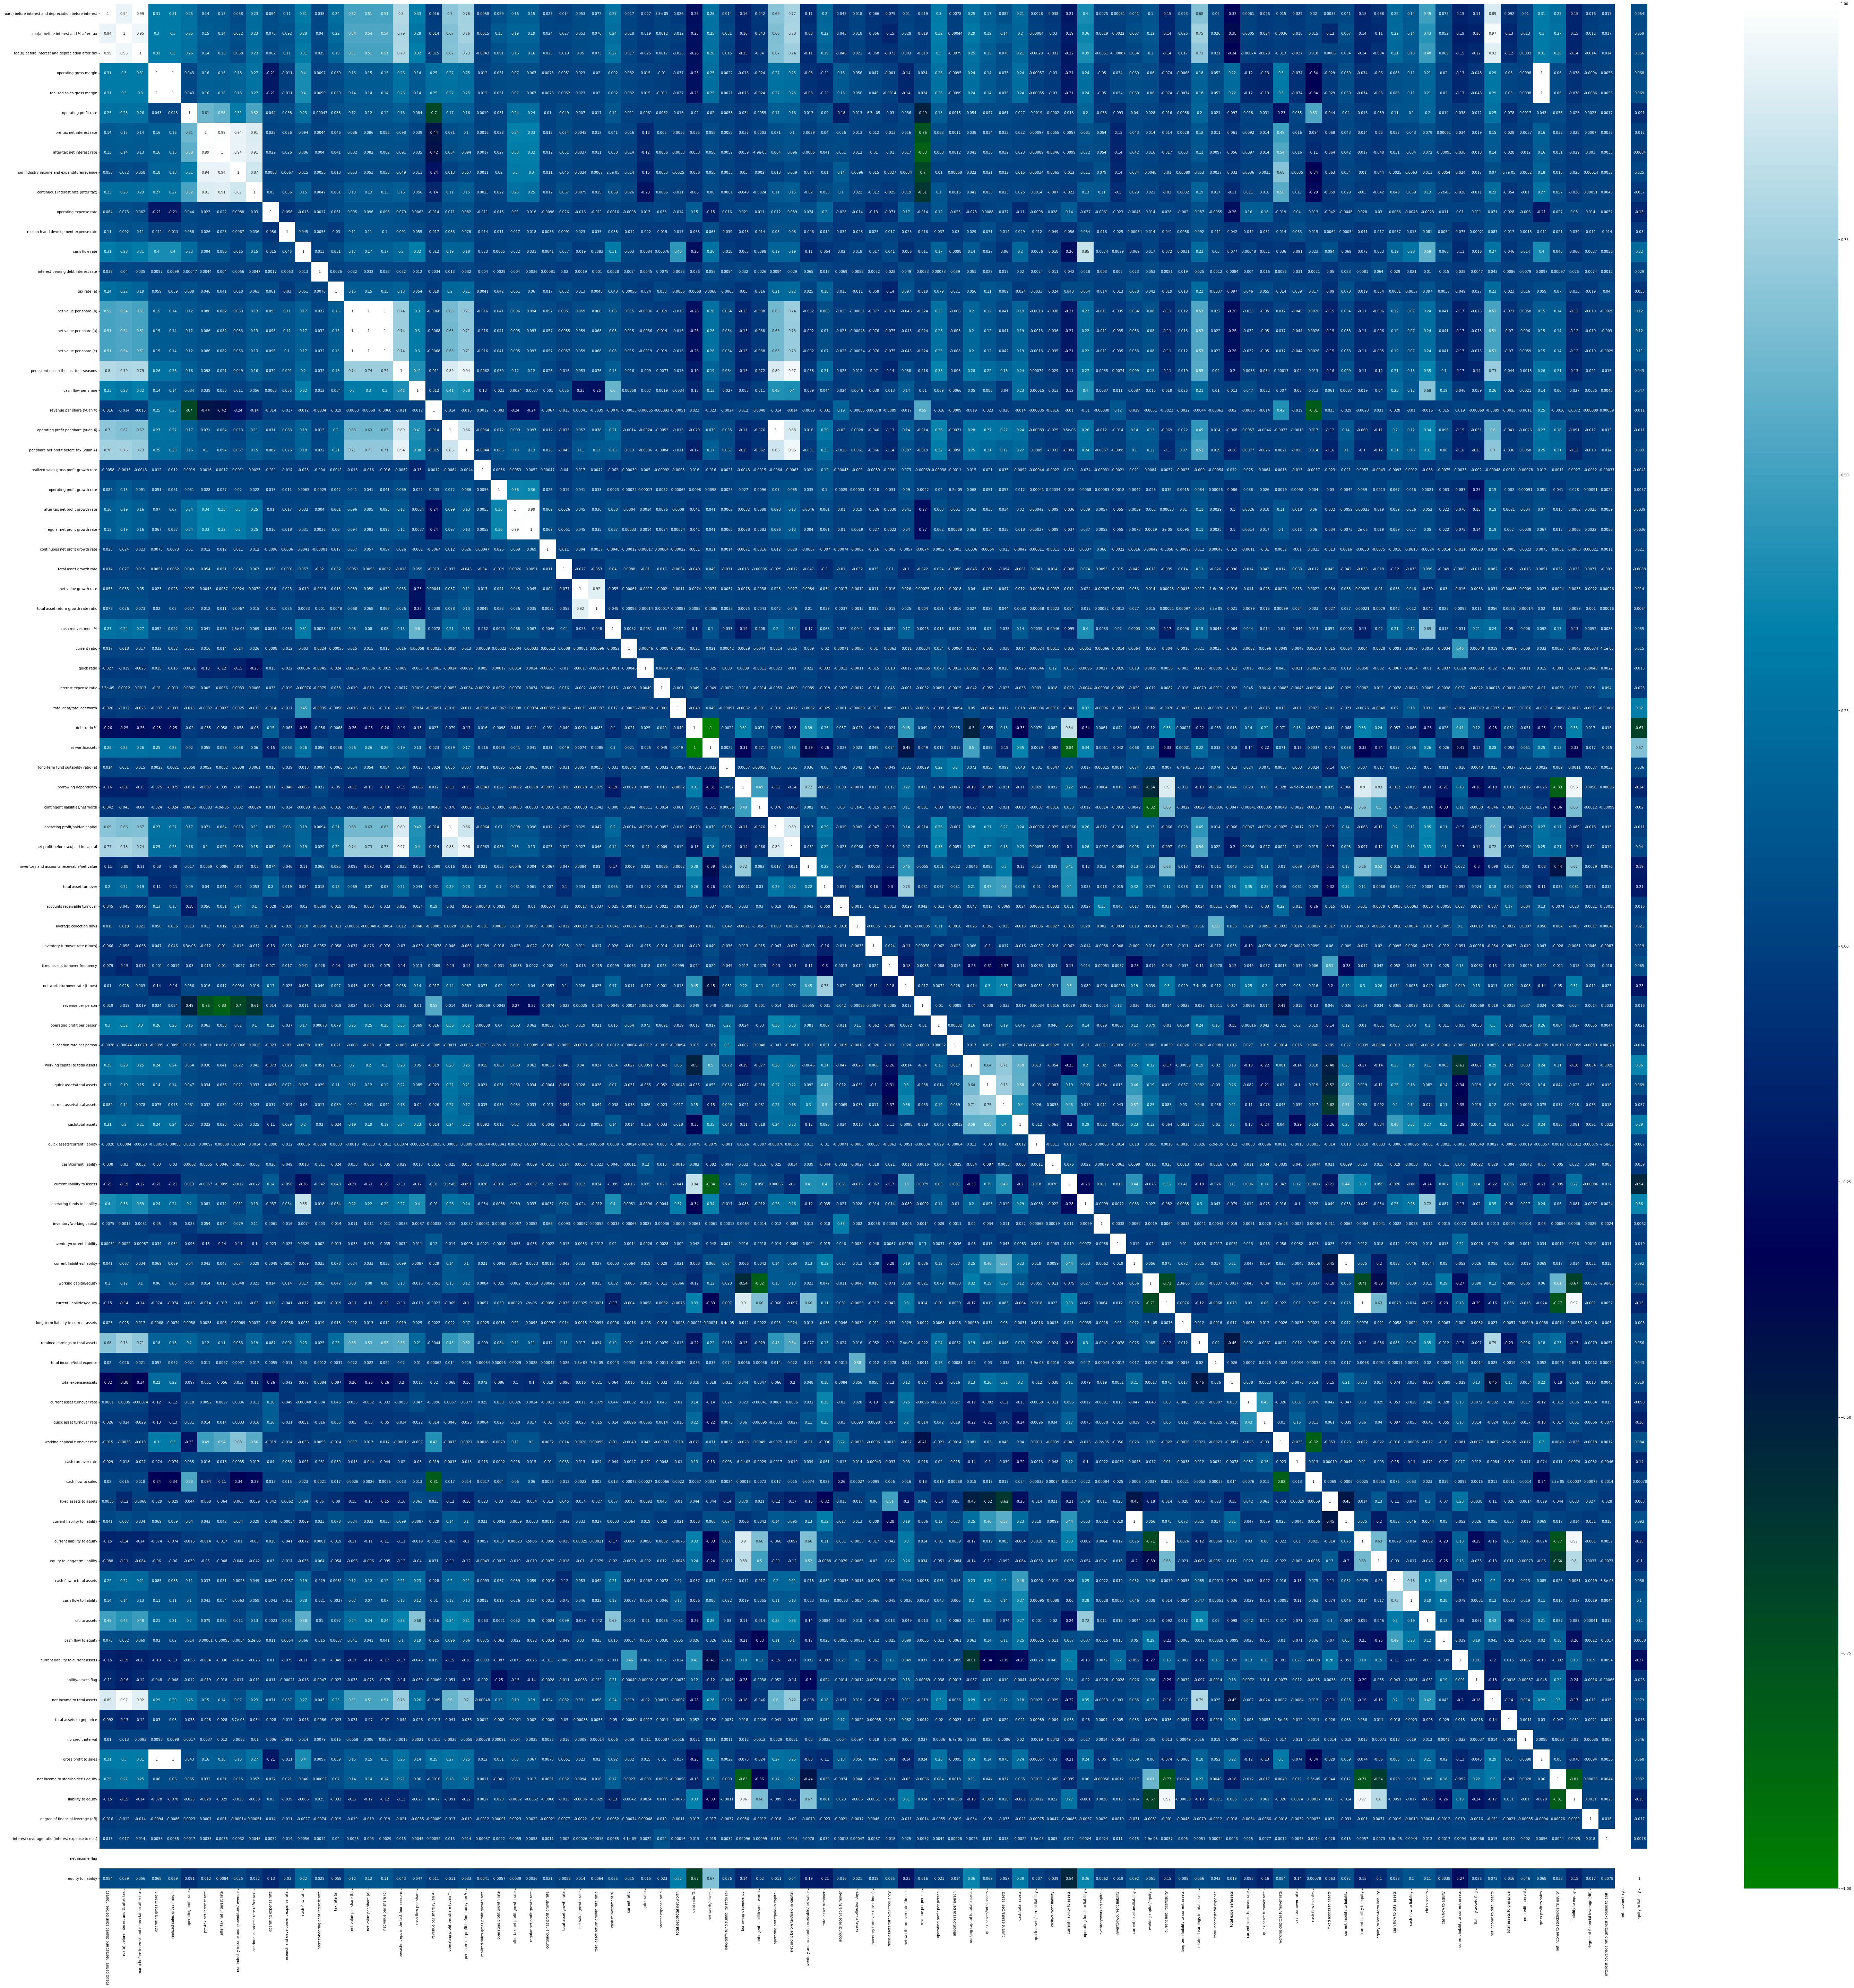

In [26]:
plt.figure(figsize=(100,100))

sns.heatmap( df_train.corr(),
            annot = True,
            cmap = "ocean" )

plt.show()

### Feature importance: Bankrupt Difference Rate

In [28]:
from IPython.display import display

In [29]:
bankruptancy = df_full_train.bankrupt.mean()

In [30]:
for c in df.columns:
    df_group = df_full_train.groupby(c).bankrupt.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - bankruptancy
    display(df_group)
    print()
    print()

mean  count      diff
bankrupt                       
0          0.0   5285 -0.031164
1          1.0    170  0.968836

mean  count      diff
 roa(c) before interest and depreciation before...                       
0.000000                                             0.0      1 -0.031164
0.024277                                             1.0      1  0.968836
0.066933                                             1.0      1  0.968836
0.081412                                             0.0      1 -0.031164
0.102325                                             1.0      1  0.968836
...                                                  ...    ...       ...
0.754643                                             0.0      1 -0.031164
0.755131                                             0.0      1 -0.031164
0.780139                                             0.0      1 -0.031164
0.818018                                             0.0      1 -0.031164
0.864964                                             0.0      1 -0.031164

[2985 rows x 3 columns]

mean  count      diff
 roa(a) before interest and % after tax                       
0.000000                                  1.0      1  0.968836
0.006923                                  0.0      1 -0.031164
0.057185                                  1.0      1  0.968836
0.090166                                  1.0      1  0.968836
0.090711                                  0.0      1 -0.031164
...                                       ...    ...       ...
0.820159                                  0.0      1 -0.031164
0.875600                                  0.0      1 -0.031164
0.942706                                  0.0      1 -0.031164
0.954536                                  0.0      1 -0.031164
0.984736                                  0.0      1 -0.031164

[2802 rows x 3 columns]

mean  count      diff
 roa(b) before interest and depreciation after tax                       
0.000000                                             0.0      1 -0.031164
0.033514                                             1.0      1  0.968836
0.054821                                             1.0      1  0.968836
0.091761                                             0.0      1 -0.031164
0.112212                                             1.0      1  0.968836
...                                                  ...    ...       ...
0.803897                                             0.0      1 -0.031164
0.810268                                             0.0      1 -0.031164
0.814551                                             0.0      1 -0.031164
0.869158                                             0.0      1 -0.031164
0.932598                                             0.0      1 -0.031164

[2815 rows x 3 columns]

mean  count      diff
 operating gross margin                           
0.000000                 0.000000      1 -0.031164
0.432653                 0.000000      1 -0.031164
0.445646                 0.000000      1 -0.031164
0.449761                 0.000000      1 -0.031164
0.512691                 0.000000      1 -0.031164
...                           ...    ...       ...
0.664502                 0.000000      1 -0.031164
0.664553                 0.000000      1 -0.031164
0.664870                 0.000000      1 -0.031164
0.665151                 0.333333      3  0.302169
1.000000                 0.000000      1 -0.031164

[3323 rows x 3 columns]

mean  count      diff
 realized sales gross margin                           
0.000000                      0.000000      1 -0.031164
0.432653                      0.000000      1 -0.031164
0.445646                      0.000000      1 -0.031164
0.449761                      0.000000      1 -0.031164
0.512691                      0.000000      1 -0.031164
...                                ...    ...       ...
0.664553                      0.000000      1 -0.031164
0.664870                      0.000000      1 -0.031164
0.665151                      0.333333      3  0.302169
0.666023                      0.000000      1 -0.031164
1.000000                      0.000000      1 -0.031164

[3317 rows x 3 columns]

mean  count      diff
 operating profit rate                       
0.962961                 0.0      1 -0.031164
0.973875                 0.0      1 -0.031164
0.975215                 0.0      1 -0.031164
0.975998                 0.0      1 -0.031164
0.986163                 0.0      1 -0.031164
...                      ...    ...       ...
0.999644                 0.0      1 -0.031164
0.999650                 0.0      1 -0.031164
0.999706                 0.0      1 -0.031164
0.999778                 0.0      1 -0.031164
1.000000                 0.0      1 -0.031164

[2968 rows x 3 columns]

mean  count      diff
 pre-tax net interest rate                       
0.616328                     0.0      1 -0.031164
0.757216                     1.0      1  0.968836
0.765114                     0.0      1 -0.031164
0.765710                     0.0      1 -0.031164
0.767759                     0.0      1 -0.031164
...                          ...    ...       ...
0.805640                     0.0      1 -0.031164
0.807062                     0.0      1 -0.031164
0.809513                     0.0      1 -0.031164
0.812848                     0.0      1 -0.031164
0.850681                     0.0      1 -0.031164

[3304 rows x 3 columns]

mean  count      diff
 after-tax net interest rate                       
0.636191                       0.0      1 -0.031164
0.761550                       1.0      1  0.968836
0.771507                       1.0      1  0.968836
0.778927                       0.0      1 -0.031164
0.781429                       0.0      1 -0.031164
...                            ...    ...       ...
0.817080                       0.0      1 -0.031164
0.817723                       0.0      1 -0.031164
0.821053                       0.0      1 -0.031164
0.822551                       0.0      1 -0.031164
0.864386                       0.0      1 -0.031164

[3160 rows x 3 columns]

mean  count      diff
 non-industry income and expenditure/revenue                       
0.062507                                       0.0      1 -0.031164
0.235090                                       1.0      1  0.968836
0.271546                                       0.0      1 -0.031164
0.272989                                       1.0      1  0.968836
0.290528                                       0.0      1 -0.031164
...                                            ...    ...       ...
0.320065                                       0.0      1 -0.031164
0.321553                                       0.0      1 -0.031164
0.329207                                       0.0      1 -0.031164
0.330080                                       0.0      1 -0.031164
0.446321                                       0.0      1 -0.031164

[2263 rows x 3 columns]

mean  count      diff
 continuous interest rate (after tax)                       
0.712333                                0.0      1 -0.031164
0.742704                                1.0      1  0.968836
0.748816                                0.0      1 -0.031164
0.751272                                0.0      1 -0.031164
0.755716                                0.0      1 -0.031164
...                                     ...    ...       ...
0.789747                                0.0      1 -0.031164
0.790431                                0.0      1 -0.031164
0.795631                                0.0      1 -0.031164
0.795912                                0.0      1 -0.031164
0.829203                                0.0      1 -0.031164

[3154 rows x 3 columns]

mean  count      diff
 operating expense rate                       
0.000000e+00              0.0      1 -0.031164
1.000256e-04              0.0      3 -0.031164
1.001412e-04              0.0      3 -0.031164
1.002568e-04              0.0      6 -0.031164
1.003725e-04              0.0      3 -0.031164
...                       ...    ...       ...
9.930000e+09              0.0      4 -0.031164
9.960000e+09              0.0      4 -0.031164
9.970000e+09              0.0      4 -0.031164
9.980000e+09              0.0      4 -0.031164
9.990000e+09              0.0      1 -0.031164

[2635 rows x 3 columns]

mean  count      diff
 research and development expense rate                           
0.000000e+00                            0.050176   1136  0.019012
1.000036e-04                            0.000000      1 -0.031164
1.001734e-04                            0.000000      4 -0.031164
1.003432e-04                            0.000000      3 -0.031164
1.005129e-04                            0.000000      2 -0.031164
...                                          ...    ...       ...
9.880000e+09                            0.000000      1 -0.031164
9.900000e+09                            0.000000      2 -0.031164
9.920000e+09                            0.333333      3  0.302169
9.930000e+09                            0.000000      3 -0.031164
9.980000e+09                            0.000000      4 -0.031164

[1369 rows x 3 columns]

mean  count      diff
 cash flow rate                       
0.000000          0.0      1 -0.031164
0.306652          0.0      1 -0.031164
0.346623          0.0      1 -0.031164
0.375773          0.0      1 -0.031164
0.375808          0.0      1 -0.031164
...               ...    ...       ...
0.638962          0.0      1 -0.031164
0.643611          0.0      1 -0.031164
0.674556          0.0      1 -0.031164
0.743251          0.0      1 -0.031164
1.000000          0.0      1 -0.031164

[4626 rows x 3 columns]

mean  count      diff
 interest-bearing debt interest rate                           
0.000000e+00                          0.004261    704 -0.026903
1.000100e-04                          0.000000      1 -0.031164
1.010101e-04                          0.000000      4 -0.031164
1.020102e-04                          0.000000      4 -0.031164
1.030103e-04                          0.000000      4 -0.031164
...                                        ...    ...       ...
9.500000e+08                          0.000000      3 -0.031164
9.600000e+08                          0.000000      3 -0.031164
9.700000e+08                          0.000000      2 -0.031164
9.800000e+08                          0.000000      5 -0.031164
9.900000e+08                          0.000000      4 -0.031164

[1017 rows x 3 columns]

mean  count      diff
 tax rate (a)                           
0.000000       0.071707   2050  0.040543
0.000101       0.000000      2 -0.031164
0.000202       0.000000      3 -0.031164
0.000304       0.000000      1 -0.031164
0.000405       0.000000      5 -0.031164
...                 ...    ...       ...
0.976617       0.000000      1 -0.031164
0.986132       0.000000      1 -0.031164
0.987246       0.000000      1 -0.031164
0.991902       0.000000      1 -0.031164
1.000000       0.000000      1 -0.031164

[2200 rows x 3 columns]

mean  count      diff
 net value per share (b)                       
0.000000                   0.0      1 -0.031164
0.069656                   1.0      1  0.968836
0.102398                   1.0      1  0.968836
0.120012                   1.0      1  0.968836
0.120180                   1.0      1  0.968836
...                        ...    ...       ...
0.431208                   0.0      1 -0.031164
0.464540                   0.0      1 -0.031164
0.475918                   0.0      1 -0.031164
0.536724                   0.0      1 -0.031164
0.549197                   0.0      1 -0.031164

[2082 rows x 3 columns]

mean  count      diff
 net value per share (a)                       
0.000000                   0.0      1 -0.031164
0.065063                   0.0      1 -0.031164
0.069656                   1.0      1  0.968836
0.102398                   1.0      1  0.968836
0.113354                   1.0      1  0.968836
...                        ...    ...       ...
0.431208                   0.0      1 -0.031164
0.464540                   0.0      1 -0.031164
0.475918                   0.0      1 -0.031164
0.536724                   0.0      1 -0.031164
0.549197                   0.0      1 -0.031164

[2088 rows x 3 columns]

mean  count      diff
 net value per share (c)                       
0.000000                   0.0      1 -0.031164
0.065063                   0.0      1 -0.031164
0.069656                   1.0      1  0.968836
0.102398                   1.0      1  0.968836
0.113354                   1.0      1  0.968836
...                        ...    ...       ...
0.431208                   0.0      1 -0.031164
0.464540                   0.0      1 -0.031164
0.475918                   0.0      1 -0.031164
0.536724                   0.0      1 -0.031164
0.549197                   0.0      1 -0.031164

[2087 rows x 3 columns]

mean  count      diff
 persistent eps in the last four seasons                       
0.000000                                   1.0      1  0.968836
0.078567                                   0.0      1 -0.031164
0.079512                                   1.0      1  0.968836
0.084239                                   1.0      1  0.968836
0.101825                                   1.0      1  0.968836
...                                        ...    ...       ...
0.515364                                   0.0      1 -0.031164
0.534745                                   0.0      1 -0.031164
0.662192                                   0.0      1 -0.031164
0.762693                                   0.0      1 -0.031164
0.779522                                   0.0      1 -0.031164

[1259 rows x 3 columns]

mean  count      diff
 cash flow per share                       
0.000000               0.0      1 -0.031164
0.128740               0.0      1 -0.031164
0.169449               0.0      1 -0.031164
0.208460               1.0      1  0.968836
0.211007               0.0      1 -0.031164
...                    ...    ...       ...
0.448150               0.0      1 -0.031164
0.456250               0.0      1 -0.031164
0.462227               0.0      1 -0.031164
0.519134               0.0      1 -0.031164
1.000000               0.0      1 -0.031164

[1421 rows x 3 columns]

mean  count      diff
 revenue per share (yuan ¥)                       
1.058729e-04                  1.0      1  0.968836
1.361223e-04                  1.0      1  0.968836
1.814964e-04                  0.0      2 -0.031164
1.966211e-04                  0.0      3 -0.031164
2.117458e-04                  0.0      2 -0.031164
...                           ...    ...       ...
7.209644e-01                  0.0      1 -0.031164
9.932846e-01                  0.0      1 -0.031164
1.000000e+00                  0.0      1 -0.031164
1.510000e+09                  0.0      2 -0.031164
3.020000e+09                  0.0      1 -0.031164

[3331 rows x 3 columns]

mean  count      diff
 operating profit per share (yuan ¥)                       
0.000000                               1.0      1  0.968836
0.006270                               0.0      1 -0.031164
0.013924                               0.0      1 -0.031164
0.014820                               1.0      1  0.968836
0.018158                               1.0      1  0.968836
...                                    ...    ...       ...
0.344679                               0.0      1 -0.031164
0.371468                               0.0      1 -0.031164
0.375865                               0.0      1 -0.031164
0.590994                               0.0      1 -0.031164
0.735445                               0.0      1 -0.031164

[1146 rows x 3 columns]

mean  count      diff
 per share net profit before tax (yuan ¥)                       
0.000000                                    1.0      1  0.968836
0.009114                                    0.0      1 -0.031164
0.050237                                    0.0      1 -0.031164
0.054304                                    1.0      1  0.968836
0.067485                                    1.0      1  0.968836
...                                         ...    ...       ...
0.509076                                    0.0      1 -0.031164
0.635159                                    0.0      1 -0.031164
0.682609                                    0.0      1 -0.031164
0.698125                                    0.0      1 -0.031164
0.792348                                    0.0      1 -0.031164

[1407 rows x 3 columns]

mean  count      diff
 realized sales gross profit growth rate                       
0.000000                                   0.0      1 -0.031164
0.004282                                   0.0      1 -0.031164
0.007183                                   0.0      1 -0.031164
0.009273                                   0.0      1 -0.031164
0.009889                                   0.0      1 -0.031164
...                                        ...    ...       ...
0.078910                                   1.0      1  0.968836
0.081038                                   0.0      1 -0.031164
0.081282                                   0.0      1 -0.031164
0.101643                                   0.0      1 -0.031164
1.000000                                   0.0      1 -0.031164

[4625 rows x 3 columns]

mean  count      diff
 operating profit growth rate                       
0.736430                        1.0      1  0.968836
0.777860                        0.0      1 -0.031164
0.792087                        0.0      1 -0.031164
0.810684                        0.0      1 -0.031164
0.817521                        0.0      1 -0.031164
...                             ...    ...       ...
0.874452                        0.0      1 -0.031164
0.887704                        0.0      1 -0.031164
0.892423                        0.0      1 -0.031164
0.932216                        0.0      1 -0.031164
1.000000                        0.0      1 -0.031164

[5094 rows x 3 columns]

mean  count      diff
 after-tax net profit growth rate                       
0.364231                            0.0      1 -0.031164
0.499446                            0.0      1 -0.031164
0.534824                            1.0      1  0.968836
0.559274                            1.0      1  0.968836
0.576146                            1.0      1  0.968836
...                                 ...    ...       ...
0.790471                            0.0      1 -0.031164
0.809914                            0.0      1 -0.031164
0.834287                            0.0      1 -0.031164
0.837205                            0.0      1 -0.031164
0.878199                            0.0      1 -0.031164

[5073 rows x 3 columns]

mean  count      diff
 regular net profit growth rate                       
0.364231                          0.0      1 -0.031164
0.499446                          0.0      1 -0.031164
0.534824                          1.0      1  0.968836
0.559274                          1.0      1  0.968836
0.576146                          1.0      1  0.968836
...                               ...    ...       ...
0.790471                          0.0      1 -0.031164
0.809914                          0.0      1 -0.031164
0.834287                          0.0      1 -0.031164
0.837205                          0.0      1 -0.031164
0.878199                          0.0      1 -0.031164

[5082 rows x 3 columns]

mean  count      diff
 continuous net profit growth rate                       
0.000000                             0.0      1 -0.031164
0.095759                             0.0      1 -0.031164
0.161651                             1.0      1  0.968836
0.181971                             0.0      1 -0.031164
0.199379                             0.0      1 -0.031164
...                                  ...    ...       ...
0.229992                             0.0      1 -0.031164
0.234080                             0.0      1 -0.031164
0.239307                             0.0      1 -0.031164
0.243456                             0.0      1 -0.031164
1.000000                             0.0      1 -0.031164

[5110 rows x 3 columns]

mean  count      diff
 total asset growth rate                       
1.000339e-04               0.0      1 -0.031164
1.001546e-04               0.0      2 -0.031164
1.002512e-04               0.0      1 -0.031164
1.002593e-04               0.0      1 -0.031164
1.002753e-04               0.0      1 -0.031164
...                        ...    ...       ...
9.950000e+09               0.0      2 -0.031164
9.960000e+09               0.0      1 -0.031164
9.970000e+09               0.0      4 -0.031164
9.980000e+09               0.0      4 -0.031164
9.990000e+09               0.0      1 -0.031164

[1534 rows x 3 columns]

mean  count      diff
 net value growth rate                       
0.000000                 1.0      1  0.968836
0.000122                 1.0      1  0.968836
0.000154                 1.0      1  0.968836
0.000165                 1.0      1  0.968836
0.000167                 1.0      1  0.968836
...                      ...    ...       ...
0.017329                 0.0      1 -0.031164
0.027654                 0.0      1 -0.031164
0.030296                 0.0      1 -0.031164
0.063592                 0.0      1 -0.031164
0.138678                 0.0      1 -0.031164

[3842 rows x 3 columns]

mean  count      diff
 total asset return growth rate ratio                       
0.251620                                1.0      1  0.968836
0.256152                                1.0      1  0.968836
0.257899                                1.0      1  0.968836
0.258096                                0.0      1 -0.031164
0.258741                                1.0      1  0.968836
...                                     ...    ...       ...
0.285429                                0.0      1 -0.031164
0.293435                                0.0      1 -0.031164
0.322532                                0.0      1 -0.031164
0.358629                                0.0      1 -0.031164
1.000000                                0.0      1 -0.031164

[2611 rows x 3 columns]

mean  count      diff
 cash reinvestment %                       
0.000000               0.0      1 -0.031164
0.025828               1.0      1  0.968836
0.156077               0.0      1 -0.031164
0.200244               0.0      1 -0.031164
0.206484               1.0      1  0.968836
...                    ...    ...       ...
0.503353               0.0      1 -0.031164
0.511456               0.0      1 -0.031164
0.666397               0.0      1 -0.031164
0.759947               0.0      1 -0.031164
1.000000               1.0      1  0.968836

[3151 rows x 3 columns]

mean  count      diff
 current ratio                       
1.628700e-04     0.0      1 -0.031164
3.550691e-04     1.0      1  0.968836
4.112312e-04     0.0      1 -0.031164
4.374401e-04     0.0      1 -0.031164
4.536647e-04     0.0      1 -0.031164
...              ...    ...       ...
2.825894e-01     0.0      1 -0.031164
5.208034e-01     0.0      1 -0.031164
7.126299e-01     0.0      1 -0.031164
1.000000e+00     0.0      1 -0.031164
2.750000e+09     0.0      1 -0.031164

[5010 rows x 3 columns]

mean  count      diff
 quick ratio                       
1.004383e-04   0.0      1 -0.031164
1.029337e-04   0.0      1 -0.031164
1.204012e-04   0.0      1 -0.031164
1.216489e-04   0.0      1 -0.031164
1.222727e-04   0.0      1 -0.031164
...            ...    ...       ...
3.490000e+09   0.0      1 -0.031164
5.240000e+09   0.0      1 -0.031164
5.800000e+09   0.0      1 -0.031164
8.480000e+09   0.0      1 -0.031164
9.230000e+09   1.0      1  0.968836

[5005 rows x 3 columns]

mean  count      diff
 interest expense ratio                       
0.000000                  0.0      1 -0.031164
0.459985                  0.0      1 -0.031164
0.521471                  0.0      1 -0.031164
0.525126                  1.0      1  0.968836
0.538626                  0.0      1 -0.031164
...                       ...    ...       ...
0.726881                  0.0      1 -0.031164
0.759185                  0.0      1 -0.031164
0.812165                  1.0      1  0.968836
0.897787                  0.0      1 -0.031164
1.000000                  0.0      1 -0.031164

[3218 rows x 3 columns]

mean  count      diff
 total debt/total net worth                       
0.000000e+00                  0.0      1 -0.031164
1.294923e-04                  0.0      1 -0.031164
1.304043e-04                  0.0      1 -0.031164
1.504664e-04                  0.0      1 -0.031164
1.550260e-04                  0.0      1 -0.031164
...                           ...    ...       ...
4.740000e+08                  0.0      1 -0.031164
1.820000e+09                  0.0      1 -0.031164
3.470000e+09                  1.0      1  0.968836
6.470000e+09                  0.0      1 -0.031164
9.940000e+09                  0.0      1 -0.031164

[4614 rows x 3 columns]

mean  count      diff
 debt ratio %                       
0.000000        0.0      1 -0.031164
0.000574        0.0      1 -0.031164
0.001088        1.0      1  0.968836
0.001512        0.0      1 -0.031164
0.002086        0.0      1 -0.031164
...             ...    ...       ...
0.321371        1.0      1  0.968836
0.326934        1.0      1  0.968836
0.331892        1.0      1  0.968836
0.525410        1.0      1  0.968836
1.000000        0.0      1 -0.031164

[3701 rows x 3 columns]

mean  count      diff
 net worth/assets                       
0.000000            0.0      1 -0.031164
0.474590            1.0      1  0.968836
0.668108            1.0      1  0.968836
0.673066            1.0      1  0.968836
0.678629            1.0      1  0.968836
...                 ...    ...       ...
0.997914            0.0      1 -0.031164
0.998488            0.0      1 -0.031164
0.998912            1.0      1  0.968836
0.999426            0.0      1 -0.031164
1.000000            0.0      1 -0.031164

[3701 rows x 3 columns]

mean  count      diff
 long-term fund suitability ratio (a)                       
0.000000                                0.0      1 -0.031164
0.004129                                1.0      1  0.968836
0.004171                                1.0      1  0.968836
0.004477                                1.0      1  0.968836
0.004676                                1.0      1  0.968836
...                                     ...    ...       ...
0.317608                                0.0      1 -0.031164
0.358609                                0.0      1 -0.031164
0.481962                                0.0      1 -0.031164
0.984855                                0.0      1 -0.031164
1.000000                                0.0      1 -0.031164

[5263 rows x 3 columns]

mean  count      diff
 borrowing dependency                       
0.000000                1.0      1  0.968836
0.262035                1.0      1  0.968836
0.270743                1.0      1  0.968836
0.279725                1.0      1  0.968836
0.357056                1.0      1  0.968836
...                     ...    ...       ...
0.613650                0.0      1 -0.031164
0.734611                1.0      1  0.968836
0.887435                0.0      1 -0.031164
0.954819                1.0      1  0.968836
1.000000                1.0      1  0.968836

[3667 rows x 3 columns]

mean  count      diff
 contingent liabilities/net worth                           
0.000000                           1.000000      1  0.968836
0.000633                           1.000000      1  0.968836
0.005366                           0.027125   3318 -0.004039
0.005368                           0.000000      2 -0.031164
0.005370                           0.000000      2 -0.031164
...                                     ...    ...       ...
0.042676                           1.000000      1  0.968836
0.049600                           0.000000      1 -0.031164
0.070715                           0.000000      1 -0.031164
0.073164                           0.000000      1 -0.031164
1.000000                           1.000000      1  0.968836

[1576 rows x 3 columns]

mean  count      diff
 operating profit/paid-in capital                       
0.000000                            1.0      1  0.968836
0.008859                            0.0      1 -0.031164
0.013923                            0.0      1 -0.031164
0.014787                            1.0      1  0.968836
0.026756                            1.0      1  0.968836
...                                 ...    ...       ...
0.344684                            0.0      1 -0.031164
0.371489                            0.0      1 -0.031164
0.375804                            0.0      1 -0.031164
0.590568                            0.0      1 -0.031164
0.735429                            0.0      1 -0.031164

[3823 rows x 3 columns]

mean  count      diff
 net profit before tax/paid-in capital                       
0.000000                                 1.0      1  0.968836
0.052439                                 0.0      1 -0.031164
0.057130                                 1.0      1  0.968836
0.067303                                 0.0      1 -0.031164
0.072453                                 1.0      1  0.968836
...                                      ...    ...       ...
0.442267                                 0.0      1 -0.031164
0.508521                                 0.0      1 -0.031164
0.634749                                 0.0      1 -0.031164
0.697813                                 0.0      1 -0.031164
0.792105                                 0.0      1 -0.031164

[4048 rows x 3 columns]

mean  count      diff
 inventory and accounts receivable/net value                       
0.000000                                       1.0      1  0.968836
0.283785                                       1.0      1  0.968836
0.351419                                       1.0      1  0.968836
0.384007                                       1.0      1  0.968836
0.391550                                       1.0      1  0.968836
...                                            ...    ...       ...
0.554696                                       0.0      1 -0.031164
0.573957                                       1.0      1  0.968836
0.588075                                       1.0      1  0.968836
0.707445                                       1.0      1  0.968836
1.000000                                       0.0      1 -0.031164

[4446 rows x 3 columns]

mean  count      diff
 total asset turnover                           
0.000000               0.250000      4  0.218836
0.001499               0.125000      8  0.093836
0.002999               0.166667      6  0.135503
0.004498               0.166667      6  0.135503
0.005997               0.100000     10  0.068836
...                         ...    ...       ...
0.838081               0.000000      1 -0.031164
0.866567               0.000000      1 -0.031164
0.919040               0.000000      1 -0.031164
0.958021               0.000000      1 -0.031164
0.997001               0.000000      1 -0.031164

[356 rows x 3 columns]

mean  count      diff
 accounts receivable turnover                       
0.000000e+00                    0.0      5 -0.031164
1.318820e-04                    0.0      1 -0.031164
1.623163e-04                    1.0      1  0.968836
1.724610e-04                    0.0      1 -0.031164
1.744900e-04                    0.0      2 -0.031164
...                             ...    ...       ...
4.870000e+09                    0.0      1 -0.031164
6.490000e+09                    0.0      1 -0.031164
7.300000e+09                    0.0      2 -0.031164
7.910000e+09                    0.0      1 -0.031164
9.330000e+09                    0.0      1 -0.031164

[1443 rows x 3 columns]

mean  count      diff
 average collection days                       
0.000000e+00               0.0      5 -0.031164
1.007613e-04               1.0      1  0.968836
1.118621e-04               0.0      1 -0.031164
1.152777e-04               0.0      1 -0.031164
1.255246e-04               0.0      1 -0.031164
...                        ...    ...       ...
5.810000e+09               0.0      1 -0.031164
7.860000e+09               0.0      1 -0.031164
8.370000e+09               0.0      1 -0.031164
8.800000e+09               0.0      1 -0.031164
9.730000e+09               0.0      1 -0.031164

[4563 rows x 3 columns]

mean  count      diff
 inventory turnover rate (times)                           
0.000000e+00                      0.000000      1 -0.031164
1.001223e-04                      0.000000      2 -0.031164
1.003133e-04                      0.000000      9 -0.031164
1.005044e-04                      0.000000      5 -0.031164
1.006955e-04                      0.142857      7  0.111693
...                                    ...    ...       ...
9.900000e+09                      0.000000      3 -0.031164
9.940000e+09                      0.000000      5 -0.031164
9.950000e+09                      0.000000     10 -0.031164
9.970000e+09                      0.333333      3  0.302169
9.990000e+09                      0.250000      4  0.218836

[2151 rows x 3 columns]

mean  count      diff
 fixed assets turnover frequency                           
0.000000e+00                      0.000000      5 -0.031164
1.006142e-04                      0.000000     11 -0.031164
1.013707e-04                      0.000000      8 -0.031164
1.021272e-04                      0.000000     14 -0.031164
1.028837e-04                      0.000000     13 -0.031164
...                                    ...    ...       ...
9.680000e+09                      0.000000     12 -0.031164
9.760000e+09                      0.000000      5 -0.031164
9.830000e+09                      0.250000      4  0.218836
9.910000e+09                      0.181818     11  0.150654
9.990000e+09                      0.000000     10 -0.031164

[2130 rows x 3 columns]

mean  count      diff
 net worth turnover rate (times)                           
0.000000                          0.000000      1 -0.031164
0.008871                          0.000000      3 -0.031164
0.009032                          0.285714      7  0.254550
0.009194                          0.000000      4 -0.031164
0.009355                          0.000000      2 -0.031164
...                                    ...    ...       ...
0.487097                          0.000000      1 -0.031164
0.510645                          0.000000      1 -0.031164
0.750645                          0.000000      1 -0.031164
0.847742                          0.000000      1 -0.031164
1.000000                          0.000000      1 -0.031164

[689 rows x 3 columns]

mean  count      diff
 revenue per person                       
1.410044e-04          0.0      1 -0.031164
2.085690e-04          0.0      1 -0.031164
2.173817e-04          0.0      1 -0.031164
2.261945e-04          0.0      1 -0.031164
3.436981e-04          0.0      1 -0.031164
...                   ...    ...       ...
6.459704e-01          0.0      1 -0.031164
9.911167e-01          0.0      1 -0.031164
1.000000e+00          0.0      1 -0.031164
7.050000e+09          1.0      1  0.968836
8.810000e+09          0.0      1 -0.031164

[4668 rows x 3 columns]

mean  count      diff
 operating profit per person                       
0.000000                       0.0      1 -0.031164
0.050915                       0.0      1 -0.031164
0.296601                       0.0      1 -0.031164
0.299552                       0.0      1 -0.031164
0.302289                       1.0      1  0.968836
...                            ...    ...       ...
0.907205                       0.0      1 -0.031164
0.914622                       0.0      1 -0.031164
0.927252                       0.0      1 -0.031164
0.978178                       0.0      1 -0.031164
1.000000                       0.0      1 -0.031164

[2671 rows x 3 columns]

mean  count      diff
 allocation rate per person                           
0.000000e+00                 0.166667      6  0.135503
1.026896e-04                 0.000000      1 -0.031164
1.092743e-04                 0.000000      1 -0.031164
1.202821e-04                 0.000000      1 -0.031164
1.335016e-04                 0.000000      1 -0.031164
...                               ...    ...       ...
7.970000e+09                 0.000000      1 -0.031164
8.280000e+09                 0.000000      1 -0.031164
8.410000e+09                 0.000000      1 -0.031164
8.520000e+09                 0.000000      1 -0.031164
9.570000e+09                 0.000000      1 -0.031164

[5417 rows x 3 columns]

mean  count      diff
 working capital to total assets                       
0.000000                           0.0      1 -0.031164
0.494210                           1.0      1  0.968836
0.588283                           0.0      1 -0.031164
0.588815                           1.0      1  0.968836
0.607586                           0.0      1 -0.031164
...                                ...    ...       ...
0.982632                           0.0      1 -0.031164
0.986300                           0.0      1 -0.031164
0.989152                           0.0      1 -0.031164
0.989252                           0.0      1 -0.031164
1.000000                           0.0      1 -0.031164

[5455 rows x 3 columns]

mean  count      diff
 quick assets/total assets                       
0.000000                     0.0      1 -0.031164
0.001469                     0.0      1 -0.031164
0.006131                     0.0      1 -0.031164
0.006310                     0.0      1 -0.031164
0.012452                     0.0      1 -0.031164
...                          ...    ...       ...
0.963972                     0.0      1 -0.031164
0.965243                     0.0      1 -0.031164
0.978981                     0.0      1 -0.031164
0.981009                     0.0      1 -0.031164
1.000000                     0.0      1 -0.031164

[5455 rows x 3 columns]

mean  count      diff
 current assets/total assets                       
0.000000                       0.0      1 -0.031164
0.001407                       0.0      1 -0.031164
0.006045                       0.0      1 -0.031164
0.020835                       1.0      1  0.968836
0.020920                       0.0      1 -0.031164
...                            ...    ...       ...
0.991139                       0.0      1 -0.031164
0.995453                       1.0      1  0.968836
0.996105                       0.0      1 -0.031164
0.998800                       0.0      1 -0.031164
1.000000                       0.0      1 -0.031164

[5455 rows x 3 columns]

mean  count      diff
 cash/total assets                       
0.000000             0.0      1 -0.031164
0.000184             1.0      1  0.968836
0.000315             0.0      1 -0.031164
0.000379             0.0      1 -0.031164
0.000409             1.0      1  0.968836
...                  ...    ...       ...
0.891860             0.0      1 -0.031164
0.898929             0.0      1 -0.031164
0.903032             0.0      1 -0.031164
0.925018             0.0      1 -0.031164
1.000000             0.0      1 -0.031164

[5455 rows x 3 columns]

mean  count      diff
 quick assets/current liability                       
0.000000e+00                      0.0      1 -0.031164
1.199931e-04                      0.0      1 -0.031164
1.354058e-04                      0.0      1 -0.031164
1.435339e-04                      1.0      1  0.968836
1.517690e-04                      0.0      1 -0.031164
...                               ...    ...       ...
2.512103e-01                      0.0      1 -0.031164
2.750005e-01                      0.0      1 -0.031164
3.251893e-01                      0.0      1 -0.031164
1.000000e+00                      0.0      1 -0.031164
8.140000e+09                      0.0      1 -0.031164

[5455 rows x 3 columns]

mean  count      diff
 cash/current liability                       
0.000000e+00              0.0      1 -0.031164
1.008563e-04              1.0      1  0.968836
1.008913e-04              0.0      1 -0.031164
1.031201e-04              0.0      1 -0.031164
1.042361e-04              1.0      1  0.968836
...                       ...    ...       ...
8.870000e+09              0.0      1 -0.031164
9.010000e+09              1.0      1  0.968836
9.170000e+09              0.0      1 -0.031164
9.410000e+09              0.0      1 -0.031164
9.650000e+09              0.0      1 -0.031164

[5453 rows x 3 columns]

mean  count      diff
 current liability to assets                       
0.000000                       0.0      1 -0.031164
0.001043                       0.0      1 -0.031164
0.001481                       0.0      1 -0.031164
0.001577                       0.0      1 -0.031164
0.002677                       0.0      1 -0.031164
...                            ...    ...       ...
0.302765                       1.0      1  0.968836
0.307686                       1.0      1  0.968836
0.336844                       1.0      1  0.968836
0.343143                       1.0      1  0.968836
1.000000                       0.0      1 -0.031164

[5455 rows x 3 columns]

mean  count      diff
 operating funds to liability                       
0.000000                        0.0      1 -0.031164
0.014723                        0.0      1 -0.031164
0.086267                        0.0      1 -0.031164
0.087098                        0.0      1 -0.031164
0.106178                        0.0      1 -0.031164
...                             ...    ...       ...
0.708503                        0.0      1 -0.031164
0.729414                        0.0      1 -0.031164
0.835717                        0.0      1 -0.031164
0.956425                        0.0      1 -0.031164
1.000000                        0.0      1 -0.031164

[5455 rows x 3 columns]

mean  count      diff
 inventory/working capital                       
0.000000                     0.0      1 -0.031164
0.075397                     0.0      1 -0.031164
0.176457                     0.0      1 -0.031164
0.201020                     0.0      1 -0.031164
0.220827                     0.0      1 -0.031164
...                          ...    ...       ...
0.330915                     0.0      1 -0.031164
0.342400                     0.0      1 -0.031164
0.379747                     0.0      1 -0.031164
0.466868                     0.0      1 -0.031164
1.000000                     0.0      1 -0.031164

[5270 rows x 3 columns]

mean  count      diff
 inventory/current liability                           
0.000000e+00                  0.021505    186 -0.009659
1.073657e-04                  0.000000      1 -0.031164
1.089798e-04                  0.000000      1 -0.031164
1.151446e-04                  0.000000      1 -0.031164
1.153552e-04                  0.000000      1 -0.031164
...                                ...    ...       ...
8.780000e+09                  0.000000      1 -0.031164
8.790000e+09                  1.000000      1  0.968836
8.880000e+09                  0.000000      1 -0.031164
8.960000e+09                  0.000000      1 -0.031164
9.600000e+09                  0.000000      1 -0.031164

[5269 rows x 3 columns]

mean  count      diff
 current liabilities/liability                           
0.007777                        0.000000      1 -0.031164
0.013753                        0.000000      1 -0.031164
0.015892                        0.000000      1 -0.031164
0.023913                        0.000000      1 -0.031164
0.043131                        0.000000      1 -0.031164
...                                  ...    ...       ...
0.999975                        1.000000      1  0.968836
0.999977                        0.000000      1 -0.031164
0.999980                        0.000000      1 -0.031164
0.999994                        0.000000      1 -0.031164
1.000000                        0.019868    151 -0.011297

[5305 rows x 3 columns]

mean  count      diff
 working capital/equity                       
0.000000                  1.0      1  0.968836
0.507149                  1.0      1  0.968836
0.517571                  1.0      1  0.968836
0.645339                  0.0      1 -0.031164
0.665664                  0.0      1 -0.031164
...                       ...    ...       ...
0.770523                  0.0      1 -0.031164
0.774080                  0.0      1 -0.031164
0.782322                  1.0      1  0.968836
0.825197                  1.0      1  0.968836
1.000000                  0.0      1 -0.031164

[5455 rows x 3 columns]

mean  count      diff
 current liabilities/equity                       
0.000000                      1.0      1  0.968836
0.234391                      1.0      1  0.968836
0.241053                      1.0      1  0.968836
0.246325                      1.0      1  0.968836
0.314913                      0.0      1 -0.031164
...                           ...    ...       ...
0.523022                      0.0      1 -0.031164
0.536635                      0.0      1 -0.031164
0.627817                      1.0      1  0.968836
0.775890                      1.0      1  0.968836
1.000000                      1.0      1  0.968836

[5455 rows x 3 columns]

mean  count      diff
 long-term liability to current assets                           
0.000000e+00                            0.013685   2046 -0.017479
1.006017e-04                            0.000000      1 -0.031164
1.008436e-04                            0.000000      1 -0.031164
1.013533e-04                            0.000000      1 -0.031164
1.020160e-04                            1.000000      1  0.968836
...                                          ...    ...       ...
8.750000e+09                            0.000000      1 -0.031164
9.290000e+09                            0.000000      1 -0.031164
9.310000e+09                            0.000000      1 -0.031164
9.450000e+09                            0.000000      1 -0.031164
9.540000e+09                            0.000000      1 -0.031164

[3409 rows x 3 columns]

mean  count      diff
 retained earnings to total assets                       
0.502084                             0.0      1 -0.031164
0.523823                             0.0      1 -0.031164
0.592447                             0.0      1 -0.031164
0.594171                             0.0      1 -0.031164
0.683988                             0.0      1 -0.031164
...                                  ...    ...       ...
0.992265                             0.0      1 -0.031164
0.992404                             0.0      1 -0.031164
0.993999                             0.0      1 -0.031164
0.995602                             0.0      1 -0.031164
0.998858                             0.0      1 -0.031164

[5455 rows x 3 columns]

mean  count      diff
 total income/total expense                       
0.000000                      0.0      1 -0.031164
0.000971                      1.0      1  0.968836
0.001396                      0.0      1 -0.031164
0.001425                      0.0      1 -0.031164
0.001504                      0.0      1 -0.031164
...                           ...    ...       ...
0.010284                      0.0      1 -0.031164
0.017451                      0.0      1 -0.031164
0.018872                      0.0      1 -0.031164
0.021153                      0.0      1 -0.031164
1.000000                      0.0      1 -0.031164

[5455 rows x 3 columns]

mean  count      diff
 total expense/assets                       
0.000000                0.0      1 -0.031164
0.000853                0.0      1 -0.031164
0.000895                0.0      1 -0.031164
0.001044                0.0      1 -0.031164
0.001218                0.0      1 -0.031164
...                     ...    ...       ...
0.223712                1.0      1  0.968836
0.236415                0.0      1 -0.031164
0.262269                0.0      1 -0.031164
0.368382                0.0      1 -0.031164
0.463483                1.0      1  0.968836

[5455 rows x 3 columns]

mean  count      diff
 current asset turnover rate                       
1.000008e-04                   0.0      1 -0.031164
1.000166e-04                   0.0      1 -0.031164
1.000920e-04                   0.0      1 -0.031164
1.002608e-04                   0.0      1 -0.031164
1.003076e-04                   0.0      1 -0.031164
...                            ...    ...       ...
9.950000e+09                   0.0      7 -0.031164
9.960000e+09                   0.0      3 -0.031164
9.980000e+09                   0.0      5 -0.031164
9.990000e+09                   0.0      3 -0.031164
1.000000e+10                   0.0      1 -0.031164

[5060 rows x 3 columns]

mean  count      diff
 quick asset turnover rate                       
0.000000e+00                 1.0      1  0.968836
1.000329e-04                 0.0      1 -0.031164
1.000599e-04                 0.0      1 -0.031164
1.001124e-04                 0.0      1 -0.031164
1.001149e-04                 0.0      1 -0.031164
...                          ...    ...       ...
9.960000e+09                 0.0      5 -0.031164
9.970000e+09                 0.0      3 -0.031164
9.980000e+09                 0.0      3 -0.031164
9.990000e+09                 0.0      6 -0.031164
1.000000e+10                 0.0      1 -0.031164

[4408 rows x 3 columns]

mean  count      diff
 working capitcal turnover rate                       
0.572892                          1.0      1  0.968836
0.573381                          0.0      1 -0.031164
0.588417                          0.0      1 -0.031164
0.593136                          0.0      1 -0.031164
0.593187                          1.0      1  0.968836
...                               ...    ...       ...
0.598915                          0.0      1 -0.031164
0.599229                          0.0      1 -0.031164
0.605383                          0.0      1 -0.031164
0.656489                          0.0      1 -0.031164
0.674234                          0.0      1 -0.031164

[5455 rows x 3 columns]

mean  count      diff
 cash turnover rate                       
0.000000e+00          0.0      1 -0.031164
1.000308e-04          0.0      1 -0.031164
1.000548e-04          0.0      1 -0.031164
1.004140e-04          0.0      1 -0.031164
1.004196e-04          0.0      1 -0.031164
...                   ...    ...       ...
9.930000e+09          0.0      2 -0.031164
9.940000e+09          0.0      2 -0.031164
9.950000e+09          0.0      1 -0.031164
9.980000e+09          0.0      1 -0.031164
9.990000e+09          0.0      3 -0.031164

[3402 rows x 3 columns]

mean  count      diff
 cash flow to sales                       
0.556054              0.0      1 -0.031164
0.652037              0.0      1 -0.031164
0.661814              0.0      1 -0.031164
0.665617              0.0      1 -0.031164
0.666137              0.0      1 -0.031164
...                   ...    ...       ...
0.672906              0.0      1 -0.031164
0.673501              0.0      1 -0.031164
0.674409              0.0      1 -0.031164
0.675956              0.0      1 -0.031164
0.690841              0.0      1 -0.031164

[5455 rows x 3 columns]

mean  count      diff
 fixed assets to assets                           
0.000000                 0.166667      6  0.135503
0.000102                 0.000000      1 -0.031164
0.000187                 0.000000      1 -0.031164
0.000265                 0.000000      1 -0.031164
0.000312                 0.000000      1 -0.031164
...                           ...    ...       ...
0.914384                 0.000000      1 -0.031164
0.957850                 0.000000      1 -0.031164
0.968198                 0.000000      1 -0.031164
0.998725                 0.000000      1 -0.031164
1.000000                 1.000000      1  0.968836

[5450 rows x 3 columns]

mean  count      diff
 current liability to liability                           
0.007777                         0.000000      1 -0.031164
0.013753                         0.000000      1 -0.031164
0.015892                         0.000000      1 -0.031164
0.023913                         0.000000      1 -0.031164
0.043131                         0.000000      1 -0.031164
...                                   ...    ...       ...
0.999975                         1.000000      1  0.968836
0.999977                         0.000000      1 -0.031164
0.999980                         0.000000      1 -0.031164
0.999994                         0.000000      1 -0.031164
1.000000                         0.019868    151 -0.011297

[5305 rows x 3 columns]

mean  count      diff
 current liability to equity                       
0.000000                       1.0      1  0.968836
0.234391                       1.0      1  0.968836
0.241053                       1.0      1  0.968836
0.246325                       1.0      1  0.968836
0.314913                       0.0      1 -0.031164
...                            ...    ...       ...
0.523022                       0.0      1 -0.031164
0.536635                       0.0      1 -0.031164
0.627817                       1.0      1  0.968836
0.775890                       1.0      1  0.968836
1.000000                       1.0      1  0.968836

[5455 rows x 3 columns]

mean  count      diff
 equity to long-term liability                           
0.025851                        1.000000      1  0.968836
0.090263                        1.000000      1  0.968836
0.110933                        0.013685   2046 -0.017479
0.110933                        0.000000      1 -0.031164
0.110934                        0.000000      1 -0.031164
...                                  ...    ...       ...
0.218087                        0.000000      1 -0.031164
0.480440                        1.000000      1  0.968836
0.862994                        1.000000      1  0.968836
0.922128                        1.000000      1  0.968836
1.000000                        0.000000      1 -0.031164

[3410 rows x 3 columns]

mean  count      diff
 cash flow to total assets                       
0.167678                     1.0      1  0.968836
0.284804                     0.0      1 -0.031164
0.295268                     0.0      1 -0.031164
0.311610                     0.0      1 -0.031164
0.384756                     0.0      1 -0.031164
...                          ...    ...       ...
0.919094                     0.0      1 -0.031164
0.921624                     0.0      1 -0.031164
0.935312                     0.0      1 -0.031164
0.970411                     0.0      1 -0.031164
1.000000                     0.0      1 -0.031164

[5455 rows x 3 columns]

mean  count      diff
 cash flow to liability                       
0.000000                  0.0      1 -0.031164
0.028056                  0.0      1 -0.031164
0.132339                  0.0      1 -0.031164
0.139204                  0.0      1 -0.031164
0.165547                  1.0      1  0.968836
...                       ...    ...       ...
0.775873                  0.0      1 -0.031164
0.813123                  0.0      1 -0.031164
0.889652                  0.0      1 -0.031164
0.905120                  0.0      1 -0.031164
1.000000                  0.0      1 -0.031164

[5455 rows x 3 columns]

mean  count      diff
 cfo to assets                       
0.074249         0.0      1 -0.031164
0.178074         0.0      1 -0.031164
0.205248         0.0      1 -0.031164
0.227030         1.0      1  0.968836
0.254224         0.0      1 -0.031164
...              ...    ...       ...
0.931068         0.0      1 -0.031164
0.967086         0.0      1 -0.031164
0.975197         0.0      1 -0.031164
0.983205         0.0      1 -0.031164
1.000000         0.0      1 -0.031164

[5455 rows x 3 columns]

mean  count      diff
 cash flow to equity                       
0.000000               1.0      1  0.968836
0.202312               1.0      1  0.968836
0.240450               1.0      1  0.968836
0.246595               1.0      1  0.968836
0.247631               0.0      1 -0.031164
...                    ...    ...       ...
0.376404               0.0      1 -0.031164
0.485367               1.0      1  0.968836
0.508866               0.0      1 -0.031164
0.569231               1.0      1  0.968836
1.000000               0.0      1 -0.031164

[5455 rows x 3 columns]

mean  count      diff
 current liability to current assets                       
0.000000                               0.0      1 -0.031164
0.000122                               0.0      1 -0.031164
0.000279                               0.0      1 -0.031164
0.000770                               0.0      1 -0.031164
0.000834                               0.0      1 -0.031164
...                                    ...    ...       ...
0.409563                               0.0      1 -0.031164
0.424677                               0.0      1 -0.031164
0.460675                               1.0      1  0.968836
0.650661                               0.0      1 -0.031164
0.916814                               0.0      1 -0.031164

[5455 rows x 3 columns]

mean  count      diff
 liability-assets flag                           
0                       0.030281   5449 -0.000883
1                       0.833333      6  0.802169

mean  count      diff
 net income to total assets                       
0.224792                      0.0      1 -0.031164
0.411809                      1.0      1  0.968836
0.412621                      0.0      1 -0.031164
0.420995                      1.0      1  0.968836
0.423755                      1.0      1  0.968836
...                           ...    ...       ...
0.934402                      0.0      1 -0.031164
0.938360                      0.0      1 -0.031164
0.959320                      0.0      1 -0.031164
0.982879                      0.0      1 -0.031164
1.000000                      0.0      1 -0.031164

[5455 rows x 3 columns]

mean  count      diff
 total assets to gnp price                       
1.015558e-04                 0.0      1 -0.031164
1.036447e-04                 0.0      1 -0.031164
1.068158e-04                 0.0      1 -0.031164
1.085313e-04                 0.0      1 -0.031164
1.090142e-04                 0.0      1 -0.031164
...                          ...    ...       ...
8.880000e+09                 0.0      1 -0.031164
8.890000e+09                 0.0      1 -0.031164
9.170000e+09                 1.0      1  0.968836
9.650000e+09                 0.0      1 -0.031164
9.820000e+09                 0.0      1 -0.031164

[5454 rows x 3 columns]

mean  count      diff
 no-credit interval                       
0.000000              0.0      1 -0.031164
0.419045              0.0      1 -0.031164
0.528279              0.0      1 -0.031164
0.531839              0.0      1 -0.031164
0.532172              0.0      1 -0.031164
...                   ...    ...       ...
0.792048              0.0      1 -0.031164
0.797385              0.0      1 -0.031164
0.841360              0.0      1 -0.031164
0.956387              0.0      1 -0.031164
1.000000              0.0      1 -0.031164

[5455 rows x 3 columns]

mean  count      diff
 gross profit to sales                           
0.000000                0.000000      1 -0.031164
0.432654                0.000000      1 -0.031164
0.445645                0.000000      1 -0.031164
0.449763                0.000000      1 -0.031164
0.512688                0.000000      1 -0.031164
...                          ...    ...       ...
0.664500                0.000000      1 -0.031164
0.664550                0.000000      1 -0.031164
0.664865                0.000000      1 -0.031164
0.665149                0.333333      3  0.302169
1.000000                0.000000      1 -0.031164

[5453 rows x 3 columns]

mean  count      diff
 net income to stockholder's equity                       
0.000000                              1.0      1  0.968836
0.344652                              1.0      1  0.968836
0.442176                              1.0      1  0.968836
0.634587                              0.0      1 -0.031164
0.726888                              1.0      1  0.968836
...                                   ...    ...       ...
0.856906                              1.0      1  0.968836
0.902744                              1.0      1  0.968836
0.976180                              1.0      1  0.968836
0.996912                              1.0      1  0.968836
1.000000                              1.0      1  0.968836

[5455 rows x 3 columns]

mean  count      diff
 liability to equity                       
0.000000               1.0      1  0.968836
0.182790               1.0      1  0.968836
0.199162               1.0      1  0.968836
0.209222               1.0      1  0.968836
0.259280               1.0      1  0.968836
...                    ...    ...       ...
0.435907               0.0      1 -0.031164
0.643692               1.0      1  0.968836
0.652347               0.0      1 -0.031164
0.745352               1.0      1  0.968836
1.000000               1.0      1  0.968836

[5455 rows x 3 columns]

mean  count      diff
 degree of financial leverage (dfl)                       
0.000000                              0.0      1 -0.031164
0.000789                              0.0      1 -0.031164
0.004429                              0.0      1 -0.031164
0.012845                              0.0      1 -0.031164
0.018395                              0.0      1 -0.031164
...                                   ...    ...       ...
0.264577                              1.0      1  0.968836
0.367190                              0.0      1 -0.031164
0.464388                              0.0      1 -0.031164
0.540672                              0.0      1 -0.031164
1.000000                              0.0      1 -0.031164

[4997 rows x 3 columns]

mean  count      diff
 interest coverage ratio (interest expense to e...                       
0.000000                                             0.0      1 -0.031164
0.172065                                             0.0      1 -0.031164
0.198632                                             0.0      1 -0.031164
0.319590                                             0.0      1 -0.031164
0.331613                                             0.0      1 -0.031164
...                                                  ...    ...       ...
0.664336                                             0.0      1 -0.031164
0.666761                                             0.0      1 -0.031164
0.707735                                             0.0      1 -0.031164
0.713741                                             0.0      1 -0.031164
0.735958                                             0.0      1 -0.031164

[4997 rows x 3 columns]

mean  count  diff
 net income flag                       
1                 0.031164   5455   0.0

mean  count      diff
 equity to liability                       
0.000000               0.0      1 -0.031164
0.003946               1.0      1  0.968836
0.008753               1.0      1  0.968836
0.008950               1.0      1  0.968836
0.009178               1.0      1  0.968836
...                    ...    ...       ...
0.677340               0.0      1 -0.031164
0.743588               0.0      1 -0.031164
0.798122               1.0      1  0.968836
0.881018               0.0      1 -0.031164
1.000000               0.0      1 -0.031164

[5455 rows x 3 columns]

# Feature importance: Correlation

In [35]:
correlation = df_full_train.corrwith(df_full_train.bankrupt).abs().sort_values(ascending=False)
print(correlation.to_markdown())

|                                                         |             0 |
|:--------------------------------------------------------|--------------:|
| bankrupt                                                |   1           |
| net income to total assets                              |   0.328609    |
| roa(a) before interest and % after tax                  |   0.289155    |
| roa(b) before interest and depreciation after tax       |   0.278494    |
| roa(c) before interest and depreciation before interest |   0.265831    |
| debt ratio %                                            |   0.251682    |
| net worth/assets                                        |   0.251682    |
| retained earnings to total assets                       |   0.241442    |
| persistent eps in the last four seasons                 |   0.234319    |
| net profit before tax/paid-in capital                   |   0.218759    |
| per share net profit before tax (yuan ¥)                |   0.21189     |
| current li

# DictVectorizer

In [36]:
dv = DictVectorizer(sparse=False)

In [37]:
train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

In [38]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [39]:
X_train[0]

array([1.23766143e-03, 8.09319995e-01, 6.95354560e-01, 1.10224245e-03,
       5.10552180e-03, 3.88773449e-01, 3.57006437e-01, 4.64527818e-01,
       3.19832817e-01, 4.60315910e-01, 6.71574408e-01, 6.52840862e-01,
       4.14915614e-01, 1.41000000e+09, 1.13114958e-03, 5.12356004e-02,
       6.34476031e-01, 5.36584771e-03, 7.81578676e-01, 2.18278289e-01,
       6.57000000e+09, 7.54682777e-01, 3.62341147e-01, 9.41879746e-01,
       2.40403971e-01, 4.98457523e-02, 3.62341147e-01, 9.41879746e-01,
       5.75536426e-03, 2.45336639e-01, 2.73522923e-02, 1.33118628e-02,
       1.18732838e-01, 2.32806341e-01, 9.63778131e-04, 5.96544522e-01,
       5.66906023e-01, 6.31912919e-01, 4.53045305e-04, 4.48060952e-01,
       2.03492777e-04, 5.22632083e-03, 2.71370839e-01, 3.06108722e-01,
       0.00000000e+00, 4.98660725e-03, 1.93017310e-03, 1.00000000e+00,
       8.42298777e-01, 8.04498668e-01, 1.84329990e-01, 4.90203883e-04,
       1.81281868e-01, 1.81281868e-01, 1.81281868e-01, 2.72580645e-01,
      

# Logistic regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
y_pred = model.predict_proba(X_val)[:,1]

In [51]:
bankrupt_prob = (y_pred >= 0.5)

In [52]:
df_val[bankrupt_prob]

roa(c) before interest and depreciation before interest  \
48                                           0.485058          

     roa(a) before interest and % after tax  \
48                                 0.572503   

     roa(b) before interest and depreciation after tax  \
48                                           0.536431    

     operating gross margin   realized sales gross margin  \
48                 0.609442                      0.609442   

     operating profit rate   pre-tax net interest rate  \
48                0.999013                    0.797664   

     after-tax net interest rate  \
48                      0.809556   

     non-industry income and expenditure/revenue  \
48                                      0.303911   

     continuous interest rate (after tax)  ...   net income to total assets  \
48                               0.781714  ...                      0.81411   

     total assets to gnp price   no-credit interval   gross profit to sales  \
48                    0.004172              0.62506                 0.60944   

     net income to stockholder's equity   liability to equity  \
48                             0.840892              0.274826   

     degree of financial leverage (dfl)  \
48                             0.026791   

     interest coverage ratio (interest expense to ebit)   net income flag  \
48                                           0.565159                   1   

     equity to liability  
48               0.67734  

[1 rows x 95 columns]

In [53]:
(y_val == bankrupt_prob).mean()

0.967741935483871

# Accuracy

In [55]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.032
0.05 0.710
0.10 0.820
0.15 0.868
0.20 0.896
0.25 0.918
0.30 0.927
0.35 0.932
0.40 0.938
0.45 0.949
0.50 0.968
0.55 0.968
0.60 0.968
0.65 0.968
0.70 0.968
0.75 0.968
0.80 0.968
0.85 0.968
0.90 0.968
0.95 0.968
1.00 0.968


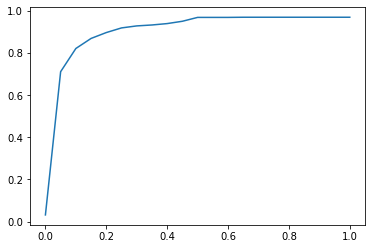

In [56]:
plt.plot(thresholds, scores)

# Confusion table

In [57]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [58]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [59]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [60]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[1320,    1],
       [  43,    0]])

In [61]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.97, 0.  ],
       [0.03, 0.  ]])

# ROC Curves

In [63]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [64]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

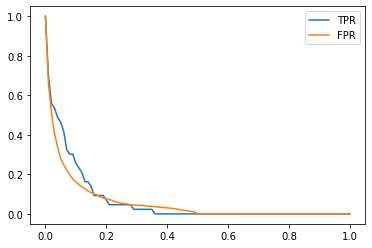

In [65]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

In [67]:
from sklearn.metrics import roc_curve

In [68]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

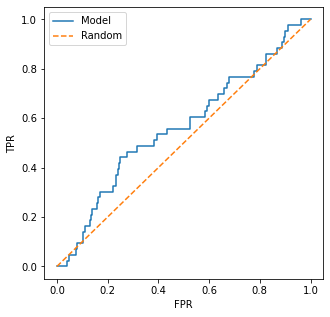

In [69]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

# ROC-AUC

In [70]:
from sklearn.metrics import roc_auc_score

In [71]:
roc_auc_score(y_val, y_pred)

0.563192084925092

# DECISION TRESS

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [101]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1, )
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1,)

In [102]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_full_train = df_full_train.reset_index(drop=True)

In [103]:
y_train = df_train.bankrupt.values
y_val = df_val.bankrupt.values
y_test = df_test.bankrupt.values

In [105]:
del df_train['bankrupt']
del df_val['bankrupt']
del df_test['bankrupt']

In [106]:
train_dicts = df_train.to_dict(orient='records')

In [107]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [108]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [109]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [110]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.5902681196415682

In [111]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

In [112]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [121]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.9674054681106335
val: 0.46160414062637545


In [122]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|---  net profit before tax/paid-in capital <= 0.14
|   |---  net value growth rate <= 0.00
|   |   |---  retained earnings to total assets <= 0.67
|   |   |   |--- class: 0
|   |   |---  retained earnings to total assets >  0.67
|   |   |   |--- class: 1
|   |---  net value growth rate >  0.00
|   |   |---  interest-bearing debt interest rate <= 0.00
|   |   |   |---  inventory turnover rate (times) <= 0.00
|   |   |   |   |---  research and development expense rate <= 0.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |---  research and development expense rate >  0.00
|   |   |   |   |   |---  allocation rate per person <= 0.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |---  allocation rate per person >  0.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |---  inventory turnover rate (times) >  0.00
|   |   |   |   |---  operating profit per person <= 0.37
|   |   |   |   |   |---  persistent eps in the last four seasons <= 0.16
|   |   |   |   |   |   |--- c

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [141]:
for depths in range(1, 21):
    dt = DecisionTreeClassifier(max_depth=depths)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depths, auc))

   1 -> 0.655
   2 -> 0.685
   3 -> 0.829
   4 -> 0.835
   5 -> 0.669
   6 -> 0.603
   7 -> 0.649
   8 -> 0.600
   9 -> 0.455
  10 -> 0.438
  11 -> 0.461
  12 -> 0.482
  13 -> 0.338
  14 -> 0.362
  15 -> 0.391
  16 -> 0.600
  17 -> 0.597
  18 -> 0.604
  19 -> 0.578
  20 -> 0.603


In [153]:
scores = []

for depths in range(1, 21):
    for s in range (1, 502,50):
        dt = DecisionTreeClassifier(max_depth=depths, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depths, s, auc))

In [154]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [155]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                                                   \
max_depth            1      2      3      4      5      6      7      8    
min_samples_leaf                                                           
1                 0.655  0.685  0.829  0.835  0.669  0.601  0.604  0.623   
51                0.655  0.685  0.829  0.839  0.871  0.790  0.806  0.851   
101               0.698  0.700  0.832  0.853  0.865  0.885  0.885  0.865   
151               0.710  0.743  0.855  0.869  0.873  0.869  0.875  0.867   
201               0.737  0.807  0.851  0.863  0.875  0.872  0.871  0.888   
251               0.728  0.861  0.884  0.908  0.908  0.908  0.908  0.908   
301               0.750  0.858  0.888  0.884  0.896  0.896  0.896  0.896   
351               0.743  0.865  0.879  0.884  0.901  0.900  0.908  0.900   
401               0.793  0.876  0.889  0.893  0.893  0.893  0.893  0.893   
451               0.787  0.867  0.877  0.896  0.888  0.872  0.872  0.896   
501               0.782  0.869  0.881  0.878  0.893  0.893  0.893  0.878   

                                                                          \
max_depth            9      10     11     12     13     14     15     16   
min_samples_leaf                                                           
1                 0.479  0.438  0.419  0.481  0.339  0.341  0.344  0.590   
51                0.840  0.851  0.830  0.830  0.820  0.830  0.840  0.840   
101               0.863  0.876  0.866  0.863  0.863  0.865  0.884  0.873   
151               0.867  0.875  0.875  0.884  0.867  0.867  0.884  0.867   
201               0.871  0.871  0.872  0.880  0.872  0.889  0.888  0.888   
251               0.908  0.908  0.907  0.908  0.908  0.908  0.908  0.908   
301               0.896  0.896  0.896  0.896  0.896  0.896  0.896  0.896   
351               0.880  0.901  0.908  0.896  0.896  0.896  0.901  0.901   
401               0.893  0.893  0.893  0.893  0.893  0.893  0.893  0.893   
451               0.896  0.896  0.896  0.896  0.872  0.872  0.895  0.896   
501               0.893  0.893  0.893  0.893  0.878  0.893  0.893  0.893   

                                              
max_depth            17     18     19     20  
min_samples_leaf                              
1                 0.588  0.591  0.581  0.615  
51                0.831  0.850  0.840  0.831  
101               0.873  0.863  0.882  0.867  
151               0.875  0.867  0.875  0.875  
201               0.888  0.889  0.889  0.888  
251               0.908  0.908  0.908  0.908  
301               0.896  0.896  0.896  0.896  
351               0.900  0.900  0.896  0.901  
401               0.893  0.893  0.893  0.893  
451               0.872  0.896  0.872  0.896  
501               0.878  0.893  0.893  0.878

In [156]:
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=251)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=251)

In [157]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|---  net value per share (b) <= 0.16
|   |--- class: 0
|---  net value per share (b) >  0.16
|   |---  borrowing dependency <= 0.38
|   |   |---  interest coverage ratio (interest expense to ebit) <= 0.56
|   |   |   |--- class: 0
|   |   |---  interest coverage ratio (interest expense to ebit) >  0.56
|   |   |   |---  interest expense ratio <= 0.63
|   |   |   |   |--- class: 0
|   |   |   |---  interest expense ratio >  0.63
|   |   |   |   |--- class: 0
|   |---  borrowing dependency >  0.38
|   |   |--- class: 0



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# RANDOM FOREST

In [158]:
from sklearn.ensemble import RandomForestClassifier

In [159]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

In [160]:
columns = ['n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [161]:
df_scores

n_estimators       auc
0             10  0.886450
1             20  0.911677
2             30  0.924529
3             40  0.919758
4             50  0.918305
5             60  0.915101
6             70  0.913913
7             80  0.912910
8             90  0.912654
9            100  0.910911
10           110  0.910568
11           120  0.909591
12           130  0.908781
13           140  0.915964
14           150  0.916061
15           160  0.916888
16           170  0.916677
17           180  0.917320
18           190  0.917469
19           200  0.917478

Text(0, 0.5, 'AUC')

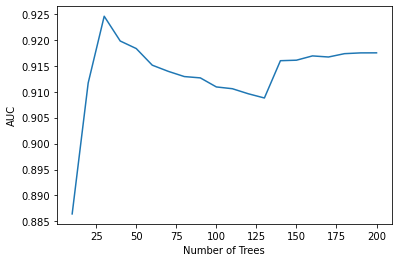

In [162]:
plt.plot(df_scores.n_estimators, df_scores.auc)
plt.xlabel('Number of Trees')
plt.ylabel('AUC')

In [163]:
scores = []

for d in range(1, 20, 1):
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1,
                                    n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [164]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [166]:
df_scores_pivot = df_scores.pivot(index='n_estimators', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                                                          \
max_depth        1      2      3      4      5      6      7      8      9    
n_estimators                                                                  
10            0.824  0.876  0.895  0.921  0.914  0.905  0.913  0.923  0.903   
20            0.857  0.871  0.902  0.923  0.912  0.914  0.921  0.928  0.907   
30            0.898  0.909  0.916  0.923  0.924  0.919  0.922  0.923  0.920   
40            0.896  0.914  0.919  0.921  0.927  0.924  0.922  0.925  0.922   
50            0.897  0.916  0.920  0.926  0.928  0.924  0.925  0.925  0.921   
60            0.906  0.916  0.920  0.925  0.929  0.923  0.926  0.929  0.925   
70            0.907  0.915  0.920  0.924  0.929  0.923  0.928  0.927  0.929   
80            0.907  0.915  0.920  0.925  0.931  0.923  0.928  0.925  0.928   
90            0.906  0.913  0.921  0.924  0.931  0.924  0.927  0.926  0.927   
100           0.906  0.915  0.922  0.924  0.931  0.926  0.926  0.928  0.925   
110           0.905  0.916  0.923  0.924  0.932  0.925  0.930  0.927  0.926   
120           0.906  0.916  0.925  0.925  0.931  0.925  0.929  0.928  0.927   
130           0.906  0.916  0.926  0.926  0.931  0.926  0.929  0.929  0.933   
140           0.906  0.916  0.925  0.926  0.931  0.925  0.929  0.928  0.932   
150           0.905  0.916  0.925  0.926  0.930  0.924  0.928  0.927  0.932   
160           0.904  0.916  0.925  0.926  0.930  0.924  0.929  0.928  0.933   
170           0.904  0.916  0.925  0.926  0.930  0.924  0.928  0.928  0.931   
180           0.904  0.915  0.925  0.927  0.929  0.924  0.929  0.927  0.932   
190           0.904  0.914  0.925  0.926  0.930  0.925  0.932  0.926  0.931   
200           0.904  0.914  0.924  0.926  0.930  0.924  0.931  0.927  0.930   

                                                                             \
max_depth        10     11     12     13     14     15     16     17     18   
n_estimators                                                                  
10            0.895  0.900  0.895  0.889  0.901  0.883  0.909  0.886  0.886   
20            0.914  0.915  0.895  0.892  0.914  0.907  0.921  0.920  0.922   
30            0.915  0.919  0.913  0.908  0.920  0.914  0.923  0.923  0.925   
40            0.912  0.914  0.910  0.911  0.917  0.911  0.919  0.919  0.920   
50            0.912  0.919  0.910  0.912  0.916  0.910  0.918  0.918  0.919   
60            0.920  0.916  0.910  0.912  0.914  0.908  0.915  0.915  0.916   
70            0.920  0.926  0.915  0.916  0.907  0.920  0.913  0.913  0.915   
80            0.918  0.924  0.919  0.920  0.906  0.919  0.912  0.912  0.913   
90            0.921  0.928  0.921  0.919  0.906  0.919  0.912  0.912  0.913   
100           0.921  0.926  0.919  0.917  0.904  0.917  0.910  0.910  0.911   
110           0.921  0.925  0.920  0.918  0.904  0.917  0.910  0.910  0.911   
120           0.922  0.924  0.921  0.917  0.903  0.917  0.909  0.909  0.910   
130           0.922  0.924  0.921  0.915  0.902  0.916  0.908  0.908  0.909   
140           0.921  0.922  0.920  0.916  0.905  0.914  0.915  0.907  0.916   
150           0.922  0.921  0.920  0.915  0.905  0.915  0.915  0.907  0.916   
160           0.925  0.920  0.922  0.916  0.906  0.915  0.916  0.908  0.917   
170           0.925  0.922  0.923  0.916  0.906  0.916  0.916  0.908  0.917   
180           0.925  0.922  0.924  0.918  0.907  0.917  0.916  0.909  0.917   
190           0.925  0.922  0.923  0.918  0.907  0.917  0.917  0.909  0.918   
200           0.925  0.924  0.925  0.918  0.908  0.917  0.917  0.909  0.918   

                     
max_depth        19  
n_estimators         
10            0.886  
20            0.922  
30            0.925  
40            0.920  
50            0.919  
60            0.916  
70            0.914  
80            0.913  
90            0.913  
100           0.911  
110           0.911  
120           0.909  
130           0.909  
140           0.916  
150   

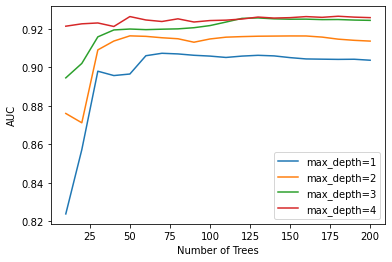

In [169]:
for d in range(1, 5, 1):
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)
    
plt.xlabel('Number of Trees')
plt.ylabel('AUC')
plt.legend()

In [170]:
scores = []

for s in range(1, 20, 1):
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=8,
                                    min_samples_leaf=s,
                                    random_state=1,
                                    n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [171]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [173]:
df_scores_pivot = df_scores.pivot(index='n_estimators', columns=['min_samples_leaf'], values=['auc'])
df_scores_pivot.round(3)

auc                                                   \
min_samples_leaf     1      2      3      4      5      6      7      8    
n_estimators                                                               
10                0.923  0.927  0.927  0.910  0.914  0.926  0.924  0.921   
20                0.928  0.929  0.920  0.928  0.929  0.923  0.919  0.924   
30                0.923  0.931  0.927  0.935  0.942  0.924  0.919  0.925   
40                0.925  0.927  0.926  0.935  0.943  0.925  0.918  0.924   
50                0.925  0.927  0.924  0.937  0.941  0.924  0.924  0.926   
60                0.929  0.926  0.924  0.936  0.940  0.925  0.926  0.925   
70                0.927  0.924  0.922  0.935  0.938  0.927  0.926  0.927   
80                0.925  0.924  0.922  0.934  0.937  0.928  0.925  0.926   
90                0.926  0.926  0.921  0.933  0.936  0.927  0.924  0.926   
100               0.928  0.925  0.923  0.933  0.934  0.929  0.928  0.928   
110               0.927  0.929  0.922  0.932  0.936  0.927  0.927  0.928   
120               0.928  0.928  0.923  0.931  0.935  0.930  0.926  0.928   
130               0.929  0.930  0.925  0.931  0.935  0.931  0.926  0.929   
140               0.928  0.929  0.925  0.932  0.934  0.931  0.925  0.930   
150               0.927  0.929  0.924  0.933  0.934  0.930  0.924  0.929   
160               0.928  0.928  0.924  0.933  0.935  0.930  0.926  0.931   
170               0.928  0.928  0.923  0.932  0.934  0.930  0.927  0.930   
180               0.927  0.927  0.923  0.932  0.934  0.931  0.928  0.930   
190               0.926  0.927  0.922  0.932  0.934  0.932  0.928  0.930   
200               0.927  0.930  0.923  0.932  0.933  0.931  0.927  0.931   

                                                                          \
min_samples_leaf     9      10     11     12     13     14     15     16   
n_estimators                                                               
10                0.907  0.912  0.907  0.925  0.928  0.930  0.909  0.919   
20                0.926  0.927  0.927  0.921  0.922  0.924  0.916  0.919   
30                0.922  0.922  0.926  0.919  0.931  0.922  0.919  0.924   
40                0.922  0.923  0.925  0.924  0.925  0.932  0.926  0.923   
50                0.924  0.924  0.924  0.926  0.925  0.938  0.934  0.933   
60                0.925  0.930  0.924  0.925  0.924  0.938  0.933  0.935   
70                0.925  0.929  0.922  0.930  0.926  0.937  0.935  0.936   
80                0.926  0.936  0.927  0.932  0.927  0.939  0.936  0.937   
90                0.926  0.935  0.925  0.931  0.927  0.939  0.934  0.937   
100               0.927  0.935  0.928  0.933  0.932  0.939  0.935  0.939   
110               0.926  0.934  0.929  0.933  0.931  0.939  0.936  0.939   
120               0.924  0.933  0.930  0.932  0.931  0.938  0.938  0.939   
130               0.926  0.933  0.929  0.931  0.929  0.937  0.937  0.938   
140               0.927  0.934  0.929  0.930  0.929  0.937  0.937  0.938   
150               0.927  0.933  0.929  0.930  0.929  0.936  0.936  0.938   
160               0.928  0.933  0.928  0.930  0.928  0.935  0.936  0.937   
170               0.927  0.933  0.929  0.931  0.930  0.935  0.936  0.937   
180               0.928  0.934  0.928  0.931  0.931  0.936  0.935  0.937   
190               0.928  0.933  0.928  0.931  0.931  0.935  0.936  0.937   
200               0.929  0.933  0.929  0.931  0.930  0.935  0.936  0.938   

                                       
min_samples_leaf     17     18     19  
n_estimators                           
10                0.915  0.919  0.917  
20                0.930  0.935  0.934  
30                0.930  0.932  0.928  
40                0.929  0.929  0.925  
50                0.927  0.926  0.920  
60                0.928  0.926  0.924  
70                0.928  0.924  0.924  
80                0.931  0.924  0.930  
90                0.932  0.929  0.934  
100               0.933  0.928  0.933  
11

In [174]:
rf = RandomForestClassifier(n_estimators=30,
                            max_depth=8,
                            min_samples_leaf=14,
                            random_state=1,
                            n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=14, n_estimators=30,
                       n_jobs=-1, random_state=1)

# XGBOOST

In [220]:
features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [221]:
#Default parameters
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [222]:
y_pred = model.predict(dval)

In [223]:
roc_auc_score(y_val, y_pred)

0.9127686917944474

In [224]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [225]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [226]:
s = output.stdout

In [227]:
print(s[:231])

[0]	train-auc:0.92590	val-auc:0.83688
[5]	train-auc:0.98514	val-auc:0.89917
[10]	train-auc:0.99964	val-auc:0.90874
[15]	train-auc:1.00000	val-auc:0.93594
[20]	train-auc:1.00000	val-auc:0.93933
[25]	train-auc:1.00000	val-auc:0.93970


In [228]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [229]:
df_score = parse_xgb_output(output)

In [230]:
df_score

num_iter  train_auc  val_auc
0          0    0.92590  0.83688
1          5    0.98514  0.89917
2         10    0.99964  0.90874
3         15    1.00000  0.93594
4         20    1.00000  0.93933
5         25    1.00000  0.93970
6         30    1.00000  0.94050
7         35    1.00000  0.94233
8         40    1.00000  0.94213
9         45    1.00000  0.94629
10        50    1.00000  0.94551
11        55    1.00000  0.94625
12        60    1.00000  0.94706
13        65    1.00000  0.94796
14        70    1.00000  0.94874
15        75    1.00000  0.94752
16        80    1.00000  0.94715
17        85    1.00000  0.94812
18        90    1.00000  0.94831
19        95    1.00000  0.94780
20       100    1.00000  0.94898
21       105    1.00000  0.94828
22       110    1.00000  0.94736
23       115    1.00000  0.94750
24       120    1.00000  0.94828
25       125    1.00000  0.94918
26       130    1.00000  0.94951
27       135    1.00000  0.94930
28       140    1.00000  0.94918
29       145    1.00000  0.94946
30       150    1.00000  0.94914
31       155    1.00000  0.94953
32       160    1.00000  0.94933
33       165    1.00000  0.94925
34       170    1.00000  0.94886
35       175    1.00000  0.94856
36       180    1.00000  0.94814
37       185    1.00000  0.94845
38       190    1.00000  0.94881
39       195    1.00000  0.94837
40       199    1.00000  0.94828

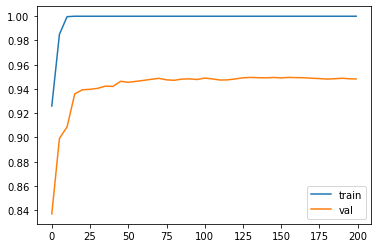

In [231]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

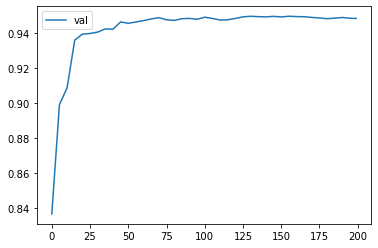

In [232]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

# XGBOOST PARAMETER TUNING

In [246]:
scores = {}

In [247]:
%%capture output


xgb_params = {
            'eta': 0.01, 
            'max_depth': 10,
            'min_child_weight': 1,

            'objective': 'binary:logistic',
            'eval_metric': 'auc',

            'nthread': 8,
            'seed': 1,
            'verbosity': 1,
        }

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                          verbose_eval=5,
                          evals=watchlist)
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

In [248]:
scores.keys()

dict_keys(['eta=0.01'])

In [249]:
%%capture output


xgb_params = {
            'eta': 0.03, 
            'max_depth': 10,
            'min_child_weight': 1,

            'objective': 'binary:logistic',
            'eval_metric': 'auc',

            'nthread': 8,
            'seed': 1,
            'verbosity': 1,
        }

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                          verbose_eval=5,
                          evals=watchlist)
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

In [251]:
%%capture output


xgb_params = {
            'eta': 0.3, 
            'max_depth': 10,
            'min_child_weight': 1,

            'objective': 'binary:logistic',
            'eval_metric': 'auc',

            'nthread': 8,
            'seed': 1,
            'verbosity': 1,
        }

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                          verbose_eval=5,
                          evals=watchlist)
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

In [252]:
%%capture output


xgb_params = {
            'eta': 0.1, 
            'max_depth': 10,
            'min_child_weight': 1,

            'objective': 'binary:logistic',
            'eval_metric': 'auc',

            'nthread': 8,
            'seed': 1,
            'verbosity': 1,
        }

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                          verbose_eval=5,
                          evals=watchlist)
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

In [253]:
%%capture output


xgb_params = {
            'eta': 0.05, 
            'max_depth': 10,
            'min_child_weight': 1,

            'objective': 'binary:logistic',
            'eval_metric': 'auc',

            'nthread': 8,
            'seed': 1,
            'verbosity': 1,
        }

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                          verbose_eval=5,
                          evals=watchlist)
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

In [254]:
%%capture output


xgb_params = {
            'eta': 0.015, 
            'max_depth': 10,
            'min_child_weight': 1,

            'objective': 'binary:logistic',
            'eval_metric': 'auc',

            'nthread': 8,
            'seed': 1,
            'verbosity': 1,
        }

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                          verbose_eval=5,
                          evals=watchlist)
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

In [255]:
scores.keys()

dict_keys(['eta=0.01', 'eta=0.03', 'eta=0.3', 'eta=0.1', 'eta=0.05', 'eta=0.015'])

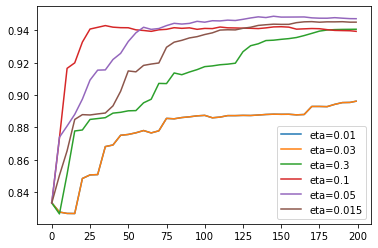

In [256]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
    
plt.legend()

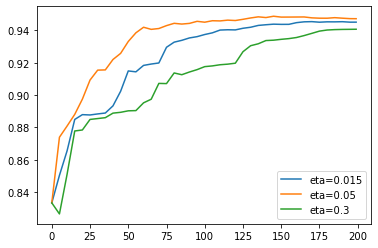

In [257]:
etas = ['eta=0.015', 'eta=0.05', 'eta=0.3']
for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
    
plt.legend()

In [258]:
scores = {}

In [259]:
%%capture output

#run for max_depth: 4, 5, 6, 7, 8, 10 ############################

xgb_params = {
            'eta': 0.05, 
            'max_depth': 4,
            'min_child_weight': 1,

            'objective': 'binary:logistic',
            'eval_metric': 'auc',

            'nthread': 8,
            'seed': 1,
            'verbosity': 1,
        }

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                          verbose_eval=5,
                          evals=watchlist)

key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)

In [260]:
%%capture output

#run for max_depth: 4, 5, 6, 7, 8, 10 ############################

xgb_params = {
            'eta': 0.05, 
            'max_depth': 5,
            'min_child_weight': 1,

            'objective': 'binary:logistic',
            'eval_metric': 'auc',

            'nthread': 8,
            'seed': 1,
            'verbosity': 1,
        }

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                          verbose_eval=5,
                          evals=watchlist)

key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)

In [261]:
%%capture output

#run for max_depth: 4, 5, 6, 7, 8, 10 ############################

xgb_params = {
            'eta': 0.05, 
            'max_depth': 6,
            'min_child_weight': 1,

            'objective': 'binary:logistic',
            'eval_metric': 'auc',

            'nthread': 8,
            'seed': 1,
            'verbosity': 1,
        }

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                          verbose_eval=5,
                          evals=watchlist)

key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)

In [262]:
%%capture output

#run for max_depth: 4, 5, 6, 7, 8, 10 ############################

xgb_params = {
            'eta': 0.05, 
            'max_depth': 7,
            'min_child_weight': 1,

            'objective': 'binary:logistic',
            'eval_metric': 'auc',

            'nthread': 8,
            'seed': 1,
            'verbosity': 1,
        }

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                          verbose_eval=5,
                          evals=watchlist)

key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)

In [263]:
%%capture output

#run for max_depth: 4, 5, 6, 7, 8, 10 ############################

xgb_params = {
            'eta': 0.05, 
            'max_depth': 8,
            'min_child_weight': 1,

            'objective': 'binary:logistic',
            'eval_metric': 'auc',

            'nthread': 8,
            'seed': 1,
            'verbosity': 1,
        }

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                          verbose_eval=5,
                          evals=watchlist)

key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)

In [264]:
%%capture output

#run for max_depth: 4, 5, 6, 7, 8, 10 ############################

xgb_params = {
            'eta': 0.05, 
            'max_depth': 9,
            'min_child_weight': 1,

            'objective': 'binary:logistic',
            'eval_metric': 'auc',

            'nthread': 8,
            'seed': 1,
            'verbosity': 1,
        }

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                          verbose_eval=5,
                          evals=watchlist)

key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)

In [265]:
%%capture output

#run for max_depth: 4, 5, 6, 7, 8, 10 ############################

xgb_params = {
            'eta': 0.05, 
            'max_depth': 10,
            'min_child_weight': 1,

            'objective': 'binary:logistic',
            'eval_metric': 'auc',

            'nthread': 8,
            'seed': 1,
            'verbosity': 1,
        }

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                          verbose_eval=5,
                          evals=watchlist)

key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)

In [266]:
scores.keys()

dict_keys(['max_depth=4', 'max_depth=5', 'max_depth=6', 'max_depth=7', 'max_depth=8', 'max_depth=9', 'max_depth=10'])

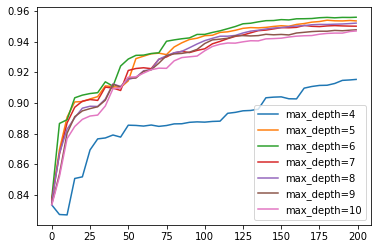

In [267]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.legend()

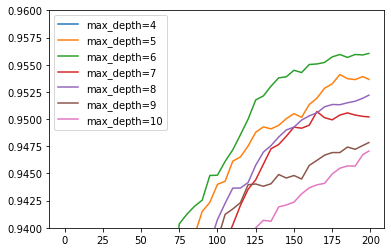

In [268]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
plt.ylim(0.94,0.96)
plt.legend()

In [269]:
scores = {}

In [270]:
%%capture output

#run for min_child_weight: 1, 5, 10, 20, 30, 40, 50   ############################

xgb_params = {
            'eta': 0.05, 
            'max_depth': 6,
            'min_child_weight': 1,

            'objective': 'binary:logistic',
            'eval_metric': 'auc',

            'nthread': 8,
            'seed': 1,
            'verbosity': 1,
        }

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                          verbose_eval=5,
                          evals=watchlist)

key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)

In [271]:
%%capture output

#run for min_child_weight: 1, 5, 10, 20, 30, 40, 50   ############################

xgb_params = {
            'eta': 0.05, 
            'max_depth': 6,
            'min_child_weight': 5,

            'objective': 'binary:logistic',
            'eval_metric': 'auc',

            'nthread': 8,
            'seed': 1,
            'verbosity': 1,
        }

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                          verbose_eval=5,
                          evals=watchlist)

key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)

In [272]:
%%capture output

#run for min_child_weight: 1, 5, 10, 20, 30, 40, 50   ############################

xgb_params = {
            'eta': 0.05, 
            'max_depth': 6,
            'min_child_weight': 10,

            'objective': 'binary:logistic',
            'eval_metric': 'auc',

            'nthread': 8,
            'seed': 1,
            'verbosity': 1,
        }

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                          verbose_eval=5,
                          evals=watchlist)

key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)

In [273]:
%%capture output

#run for min_child_weight: 1, 5, 10, 20, 30, 40, 50   ############################

xgb_params = {
            'eta': 0.05, 
            'max_depth': 6,
            'min_child_weight': 20,

            'objective': 'binary:logistic',
            'eval_metric': 'auc',

            'nthread': 8,
            'seed': 1,
            'verbosity': 1,
        }

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                          verbose_eval=5,
                          evals=watchlist)

key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)

In [274]:
%%capture output

#run for min_child_weight: 1, 5, 10, 20, 30, 40, 50   ############################

xgb_params = {
            'eta': 0.05, 
            'max_depth': 6,
            'min_child_weight': 30,

            'objective': 'binary:logistic',
            'eval_metric': 'auc',

            'nthread': 8,
            'seed': 1,
            'verbosity': 1,
        }

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                          verbose_eval=5,
                          evals=watchlist)

key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)

In [275]:
%%capture output

#run for min_child_weight: 1, 5, 10, 20, 30, 40, 50   ############################

xgb_params = {
            'eta': 0.05, 
            'max_depth': 6,
            'min_child_weight': 40,

            'objective': 'binary:logistic',
            'eval_metric': 'auc',

            'nthread': 8,
            'seed': 1,
            'verbosity': 1,
        }

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                          verbose_eval=5,
                          evals=watchlist)

key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)

In [276]:
%%capture output

#run for min_child_weight: 1, 5, 10, 20, 30, 40, 50   ############################

xgb_params = {
            'eta': 0.05, 
            'max_depth': 6,
            'min_child_weight': 50,

            'objective': 'binary:logistic',
            'eval_metric': 'auc',

            'nthread': 8,
            'seed': 1,
            'verbosity': 1,
        }

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                          verbose_eval=5,
                          evals=watchlist)

key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)

In [277]:
scores.keys()

dict_keys(['min_child_weight=1', 'min_child_weight=5', 'min_child_weight=10', 'min_child_weight=20', 'min_child_weight=30', 'min_child_weight=40', 'min_child_weight=50'])

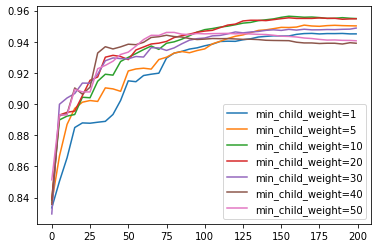

In [279]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)

plt.legend()

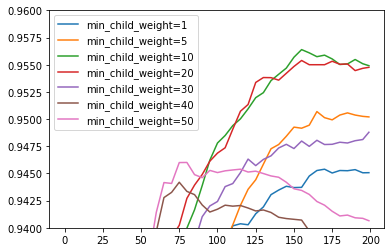

In [280]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)
plt.ylim(0.94,0.96)
plt.legend()

In [281]:
xgb_params = {
            'eta': 0.05, 
            'max_depth': 6,
            'min_child_weight': 10,

            'objective': 'binary:logistic',
            'eval_metric': 'auc',

            'nthread': 8,
            'seed': 1,
            'verbosity': 1,
        }

model = xgb.train(xgb_params, dtrain, num_boost_round=200)

# SELECTING THE BEST MODEL

In [284]:
#Decision Trees
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=251)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=251)

In [285]:
y_pred_dt = dt.predict_proba(X_val)[:,1]
auc_dt = roc_auc_score(y_val, y_pred_dt)
auc_dt

0.9083499110962449

In [286]:
#Random Forest
rf = RandomForestClassifier(n_estimators=30,
                            max_depth=8,
                            min_samples_leaf=14,
                            random_state=1,
                            n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=14, n_estimators=30,
                       n_jobs=-1, random_state=1)

In [287]:
y_pred_rf = rf.predict_proba(X_val)[:,1]
auc_rf = roc_auc_score(y_val, y_pred_rf)
auc_rf

0.9217646955266445

In [288]:
xgb_params = {
            'eta': 0.05, 
            'max_depth': 6,
            'min_child_weight': 10,

            'objective': 'binary:logistic',
            'eval_metric': 'auc',

            'nthread': 8,
            'seed': 1,
            'verbosity': 1,
        }

model = xgb.train(xgb_params, dtrain, num_boost_round=200)

In [289]:
y_pred_xgb = model.predict(dval)
auc_xgb = roc_auc_score(y_val, y_pred_xgb)
auc_xgb

0.9547559107793602

# TRAINING THE FINAL MODEL

In [290]:
df_full_train

bankrupt   roa(c) before interest and depreciation before interest  \
0            0                                           0.412178          
1            0                                           0.477502          
2            0                                           0.480622          
3            0                                           0.547701          
4            0                                           0.496271          
...        ...                                                ...          
5450         0                                           0.497343          
5451         0                                           0.525764          
5452         0                                           0.522985          
5453         1                                           0.370107          
5454         0                                           0.508848          

       roa(a) before interest and % after tax  \
0                                    0.474270   
1                                    0.537015   
2                                    0.487080   
3                                    0.546064   
4                                    0.556258   
...                                       ...   
5450                                 0.554841   
5451                                 0.587440   
5452                                 0.576101   
5453                                 0.397187   
5454                                 0.587658   

       roa(b) before interest and depreciation after tax  \
0                                              0.457733    
1                                              0.531774    
2                                              0.534611    
3                                              0.579314    
4                                              0.540232    
...                                                 ...    
5450                                           0.543177    
5451                                           0.576102    
5452                                           0.575298    
5453                                           0.404144    
5454                                           0.556989    

       operating gross margin   realized sales gross margin  \
0                    0.000000                      0.000000   
1                    0.617492                      0.617377   
2                    0.617867                      0.617867   
3                    0.608008                      0.608008   
4                    0.598481                      0.598481   
...                       ...                           ...   
5450                 0.613738                      0.613521   
5451                 0.603670                      0.603684   
5452                 0.620800                      0.620800   
5453                 0.602351                      0.602351   
5454                 0.619647                      0.619647   

       operating profit rate   pre-tax net interest rate  \
0                   0.988045                    0.784312   
1                   0.999009                    0.797387   
2                   0.999022                    0.797242   
3                   0.999119                    0.797613   
4                   0.999012                    0.797448   
...                      ...                         ...   
5450                0.999026                    0.797471   
5451                0.999018                    0.797447   
5452                0.999112                    0.797515   
5453                0.998764                    0.796962   
5454                0.999144                    0.797641   

       after-tax net interest rate  \
0                         0.796607   
1                         0.809315   
2                         0.809177   
3                         0.809432   
4                         0.809350   
...                            ...   
5450                      0.809371   
5

In [291]:
y_full_train = df_full_train.bankrupt
y_full_train

0       0
1       0
2       0
3       0
4       0
       ..
5450    0
5451    0
5452    0
5453    1
5454    0
Name: bankrupt, Length: 5455, dtype: int64

In [292]:
df_test

roa(c) before interest and depreciation before interest  \
0                                              0.477843          
1                                              0.471750          
2                                              0.455906          
3                                              0.491103          
4                                              0.506849          
...                                                 ...          
1359                                           0.463365          
1360                                           0.456296          
1361                                           0.528202          
1362                                           0.541949          
1363                                           0.543801          

       roa(a) before interest and % after tax  \
0                                    0.543066   
1                                    0.537178   
2                                    0.503216   
3                                    0.542575   
4                                    0.550316   
...                                       ...   
1359                                 0.507795   
1360                                 0.484409   
1361                                 0.561873   
1362                                 0.604394   
1363                                 0.584769   

       roa(b) before interest and depreciation after tax  \
0                                              0.530971    
1                                              0.526099    
2                                              0.513357    
3                                              0.543445    
4                                              0.554901    
...                                                 ...    
1359                                           0.511323    
1360                                           0.509235    
1361                                           0.577065    
1362                                           0.594839    
1363                                           0.597569    

       operating gross margin   realized sales gross margin  \
0                    0.601551                      0.601385   
1                    0.597198                      0.597198   
2                    0.606588                      0.606740   
3                    0.602668                      0.602668   
4                    0.602538                      0.602409   
...                       ...                           ...   
1359                 0.598034                      0.597926   
1360                 0.589335                      0.589350   
1361                 0.604008                      0.603980   
1362                 0.609104                      0.609104   
1363                 0.648827                      0.648827   

       operating profit rate   pre-tax net interest rate  \
0                   0.998982                    0.797425   
1                   0.998968                    0.797385   
2                   0.998894                    0.797101   
3                   0.999013                    0.797431   
4                   0.999019                    0.797417   
...                      ...                         ...   
1359                0.998951                    0.797310   
1360                0.998849                    0.797192   
1361                0.999074                    0.797506   
1362                0.999037                    0.797470   
1363                0.999138                    0.797587   

       after-tax net interest rate  \
0                         0.809347   
1                         0.809313   
2                         0.809085   
3                         0.809345   
4                         0.809328   
...                            ...   
1359                      0.809249   
1360                      0.809171   
1361                      0.809436   
1362                      0.809384   
1363    

In [293]:
del df_full_train['bankrupt']

In [294]:
features = dv.get_feature_names_out()
features

array([' accounts receivable turnover', ' after-tax net interest rate',
       ' after-tax net profit growth rate', ' allocation rate per person',
       ' average collection days', ' borrowing dependency',
       ' cash flow per share', ' cash flow rate', ' cash flow to equity',
       ' cash flow to liability', ' cash flow to sales',
       ' cash flow to total assets', ' cash reinvestment %',
       ' cash turnover rate', ' cash/current liability',
       ' cash/total assets', ' cfo to assets',
       ' contingent liabilities/net worth',
       ' continuous interest rate (after tax)',
       ' continuous net profit growth rate',
       ' current asset turnover rate', ' current assets/total assets',
       ' current liabilities/equity', ' current liabilities/liability',
       ' current liability to assets',
       ' current liability to current assets',
       ' current liability to equity', ' current liability to liability',
       ' current ratio', ' debt ratio %',
       ' degree

In [295]:
dv = DictVectorizer(sparse=False)

dicts_full_train = df_full_train.to_dict(orient='records')
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [296]:
d_full_train = xgb.DMatrix(X_full_train, label = y_full_train)
                   

d_test = xgb.DMatrix(X_test)

In [298]:
xgb_params = {
            'eta': 0.05, 
            'max_depth': 6,
            'min_child_weight': 10,

            'objective': 'binary:logistic',
            'eval_metric': 'auc',

            'nthread': 8,
            'seed': 1,
            'verbosity': 1,
        }

model = xgb.train(xgb_params, d_full_train, num_boost_round=200)

In [299]:
y_pred = model.predict(d_test)

In [300]:
roc_auc_score(y_test, y_pred)

0.917214611872146

In [309]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_test, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.037
0.05 0.918
0.10 0.944
0.15 0.952
0.20 0.963
0.25 0.971
0.30 0.968
0.35 0.967
0.40 0.968
0.45 0.968
0.50 0.966
0.55 0.966
0.60 0.968
0.65 0.967
0.70 0.967
0.75 0.966
0.80 0.965
0.85 0.965
0.90 0.965
0.95 0.963
1.00 0.963
